In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## read in the data filtered and summaried 
(through MMR Evaluation.R)

In [2]:
indicators = pd.read_csv('Final Data/Tidy Indicator Level Data.csv', index_col=0)

In [3]:
indicators.head()

ID Desired.Direction Critical  Agency.Number  UAAgyConcat  \
1  114                Up       No          810.0       8101.0   
2  119              Down      Yes          810.0       8101.0   
3  120              Down      Yes          810.0       8101.0   
4  121              Down       No          810.0       8101.0   
5  138                Up      Yes          810.0       8101.0   

        Agency.Full.Name.y  Unit.of.Appropriation           U.A.Name  \
1  Department of Buildings                    1.0  PERSONAL SERVICES   
2  Department of Buildings                    1.0  PERSONAL SERVICES   
3  Department of Buildings                    1.0  PERSONAL SERVICES   
4  Department of Buildings                    1.0  PERSONAL SERVICES   
5  Department of Buildings                    1.0  PERSONAL SERVICES   

        2019           2023  ...  \
1      58.13      50.340000  ...   
2       4.38       4.500000  ...   
3       5.02      12.140000  ...   
4       1.30       2.410000  ...   
5  203077.00  135207.187982  ...   

                                             Service  \
1         Facilitate safe and compliant development.   
2         Facilitate safe and compliant development.   
3         Facilitate safe and compliant development.   
4         Facilitate safe and compliant development.   
5  Ensure the safe and lawful use of buildings an...   

                                           Goal  \
1   Promptly review initial construction plans.   
2   Promptly review initial construction plans.   
3   Promptly review initial construction plans.   
4   Promptly review initial construction plans.   
5  Rigorously enforce building and zoning laws.   

                                           Indicator  Target.MMR  \
1        Permitted jobs professionally certified (%)         NaN   
2  Average days to complete first plan review (Bo...        12.0   
3  Average days to complete first plan review (Bo...        10.0   
4  Average days to complete first plan review (Bo...         4.0   
5                 Construction inspections completed    140000.0   

   Accepted.Value.YTD         Avg3yr      Avg5yr OneYrImproving  \
1               50.34      58.763333      59.114  Not_Improving   
2                4.50       6.333333       5.822      Improving   
3               12.14      10.293333       8.280      Improving   
4                2.41       2.453333       2.080  Not_Improving   
5            45792.00  153826.333333  170555.400      Improving   

  ThreeYrImproving FiveYrImproving  
1    Not_Improving   Not_Improving  
2        Improving       Improving  
3    Not_Improving   Not_Improving  
4        Improving   Not_Improving  
5    Not_Improving   Not_Improving  

[5 rows x 27 columns]

In [4]:
indicators.columns

Index(['ID', 'Desired.Direction', 'Critical', 'Agency.Number', 'UAAgyConcat',
       'Agency.Full.Name.y', 'Unit.of.Appropriation', 'U.A.Name', '2019',
       '2023', '2016', '2021', '2018', '2017', '2020', '2022', 'Success',
       'Service', 'Goal', 'Indicator', 'Target.MMR', 'Accepted.Value.YTD',
       'Avg3yr', 'Avg5yr', 'OneYrImproving', 'ThreeYrImproving',
       'FiveYrImproving'],
      dtype='object')

In [5]:
indicators = indicators.rename(columns = lambda col: col.replace('.','_'))

In [6]:
value_cols = ['2023','2022', '2021','2020','2019','2018','Target_MMR','Accepted_Value_YTD']

In [7]:
indicators[value_cols]

2023       2022       2021       2020       2019       2018  \
1         50.340000      56.11      57.96      62.22      58.13      61.15   
2          4.500000       8.50       5.30       5.20       4.38       5.73   
3         12.140000      18.70       6.80       5.38       5.02       5.50   
4          2.410000       2.05       2.65       2.66       1.30       1.74   
5     135207.187982  130837.00  162135.00  168507.00  203077.00  188221.00   
...             ...        ...        ...        ...        ...        ...   
1135   56718.038916   37754.00   25706.00   41705.00        NaN        NaN   
1136   22012.854728   12398.00   19436.00   26090.00        NaN        NaN   
1137   16072.118414   10796.00    3291.00   11161.00        NaN        NaN   
1138   18621.222707   14560.00    2979.00    4443.00        NaN        NaN   
1139     117.600000      97.40      24.70     122.30        NaN        NaN   

      Target_MMR  Accepted_Value_YTD  
1            NaN               50.34  
2           12.0                4.50  
3           10.0               12.14  
4            4.0                2.41  
5       140000.0            45792.00  
...          ...                 ...  
1135         NaN            16291.00  
1136         NaN             5671.00  
1137         NaN             5934.00  
1138         NaN             4686.00  
1139         NaN              117.60  

[1139 rows x 8 columns]

### look for indicators where estiamted FY23 is far from 5-year average

In [8]:
indicators.loc[:,'2018':'2022']

2018       2017       2020       2022
1         61.15      64.13      62.22      56.11
2          5.73       5.64       5.20       8.50
3          5.50       5.75       5.38      18.70
4          1.74       1.49       2.66       2.05
5     188221.00  156508.00  168507.00  130837.00
...         ...        ...        ...        ...
1135        NaN        NaN   41705.00   37754.00
1136        NaN        NaN   26090.00   12398.00
1137        NaN        NaN   11161.00   10796.00
1138        NaN        NaN    4443.00   14560.00
1139        NaN        NaN     122.30      97.40

[1139 rows x 4 columns]

In [9]:
indicators['mean 2018-22'] = (
    indicators[['2018','2019','2020','2021','2022']]
    .mean(
        axis=1,
        skipna=True
    )
)

In [10]:
indicators[
    indicators['mean 2018-22'].isna()
][value_cols]

2023  2022  2021  2020  2019  2018  Target_MMR  Accepted_Value_YTD
1048    35.80   NaN   NaN   NaN   NaN   NaN       100.0               35.80
1062    86.83   NaN   NaN   NaN   NaN   NaN         NaN               86.83
1063     8.00   NaN   NaN   NaN   NaN   NaN         NaN                8.00
1118   175.00   NaN   NaN   NaN   NaN   NaN         NaN              175.00
1119  1380.00   NaN   NaN   NaN   NaN   NaN         NaN             1380.00
1124    85.00   NaN   NaN   NaN   NaN   NaN        90.0               85.00
1125     8.16   NaN   NaN   NaN   NaN   NaN         NaN                8.16
1126    70.00   NaN   NaN   NaN   NaN   NaN         NaN               70.00
1133     0.30   NaN   NaN   NaN   NaN   NaN         NaN                0.30

In [11]:
indicators['2023 as pct of 2021-22'] = (
    indicators['2023']
    / indicators['mean 2018-22']
)

In [14]:
(
    indicators[
        (indicators['2023 as pct of 2021-22'] > 1.5 ) |
        (indicators['2023 as pct of 2021-22'] < 0.75) |
        (indicators['2023'].isna()) |
        (np.isinf(indicators['2023 as pct of 2021-22']))
    ]
    [value_cols]
)

2023      2022      2021      2020    2019    2018  Target_MMR  \
8     5.461552e+00      6.00     13.00      8.00   11.00   16.00         NaN   
14    4.200000e+00     15.50      2.70      3.10    3.60    3.70         7.0   
15    3.750000e+00      3.69      3.55      7.81    7.82    6.86         9.0   
24    1.410000e+00      0.35      0.51      0.14    0.25    0.36         NaN   
28    8.400000e-01      0.79      0.71      1.22    1.89    1.87         NaN   
...            ...       ...       ...       ...     ...     ...         ...   
1131           inf    621.00       NaN       NaN     NaN     NaN         NaN   
1134  1.130000e+02    124.00    154.00    183.00  186.00  203.00         NaN   
1135  5.671804e+04  37754.00  25706.00  41705.00     NaN     NaN         NaN   
1137  1.607212e+04  10796.00   3291.00  11161.00     NaN     NaN         NaN   
1138  1.862122e+04  14560.00   2979.00   4443.00     NaN     NaN         NaN   

      Accepted_Value_YTD  
8                   2.00  
14                  4.20  
15                  3.75  
24                  1.41  
28                  0.84  
...                  ...  
1131              616.00  
1134              113.00  
1135            16291.00  
1137             5934.00  
1138             4686.00  

[333 rows x 8 columns]

333 potential problems. need to check those manually. 

### pull in raw data

In [15]:
indicators_full = pd.read_csv(
    'Raw Data/Mayor_s_Management_Report_-_Agency_Performance_Indicators.csv', 
    true_values=['Yes'], false_values=['No'],
    parse_dates=['Value Date','Created On'])

In [17]:
indicators_full.columns

Index(['Agency', 'Agency Full Name', 'ID', 'Parent ID', 'Service', 'Goal',
       'Indicator', 'Retired', 'Source', 'Description', 'Created On',
       'Desired Direction', 'Geo', 'Geo Type', 'Geo Value', 'Additive',
       'Frequency', 'Lag Time', 'Reporting Period', 'Critical',
       'Measurement Type', 'Fiscal Year', 'Value Date', 'Accepted Value',
       'Accepted Value YTD', 'Target MMR', 'Target MMR2'],
      dtype='object')

In [18]:
indicators_description = (
    indicators_full
    .groupby('ID')
    .agg({
        'Frequency':max,
        'Additive':max,
        'Measurement Type':max,
        'Reporting Period':max,
        'Value Date':max,
        'Description':max
    })
)

In [19]:
indicators = indicators.merge(
    indicators_description,
    how='left',
    on='ID'
)

In [20]:
scaling = pd.read_csv('Raw Data/scale Oct value to full-year value.csv')

In [21]:
scaling

ID  Oct value fraction of full year value
0      6557                               0.388927
1     10700                               0.359433
2     11058                               0.257187
3      4408                               0.227429
4      3742                               0.311182
...     ...                                    ...
2174   4610                               0.288746
2175   9786                                    NaN
2176    188                               0.342544
2177   4639                               0.349242
2178   7370                                    NaN

[2179 rows x 2 columns]

In [22]:
indicators = (
    indicators
    .merge(
        scaling,
        on='ID',
        how='left'
    )
)

In [23]:
(
    indicators[
        (indicators['2023 as pct of 2021-22'] > 1.5 ) |
        (indicators['2023 as pct of 2021-22'] < 0.75) |
        (indicators['2023'].isna()) |
        (np.isinf(indicators['2023 as pct of 2021-22']))
    ]
    [value_cols 
     + ['2023 as pct of 2021-22',
        'mean 2018-22',
        'Additive',
        'Measurement Type',
        'Frequency',
        'Reporting Period',
        'Value Date',
        'Oct value fraction of full year value',
        'Description',
        'ID'
     ]
    ]
)

2023      2022      2021      2020    2019    2018  Target_MMR  \
7     5.461552e+00      6.00     13.00      8.00   11.00   16.00         NaN   
13    4.200000e+00     15.50      2.70      3.10    3.60    3.70         7.0   
14    3.750000e+00      3.69      3.55      7.81    7.82    6.86         9.0   
23    1.410000e+00      0.35      0.51      0.14    0.25    0.36         NaN   
27    8.400000e-01      0.79      0.71      1.22    1.89    1.87         NaN   
...            ...       ...       ...       ...     ...     ...         ...   
1130           inf    621.00       NaN       NaN     NaN     NaN         NaN   
1133  1.130000e+02    124.00    154.00    183.00  186.00  203.00         NaN   
1134  5.671804e+04  37754.00  25706.00  41705.00     NaN     NaN         NaN   
1136  1.607212e+04  10796.00   3291.00  11161.00     NaN     NaN         NaN   
1137  1.862122e+04  14560.00   2979.00   4443.00     NaN     NaN         NaN   

      Accepted_Value_YTD  2023 as pct of 2021-22  mean 2018-22  Additive  \
7                   2.00                0.505699     10.800000      True   
13                  4.20                0.734266      5.720000     False   
14                  3.75                0.630676      5.946000     False   
23                  1.41                4.378882      0.322000     False   
27                  0.84                0.648148      1.296000     False   
...                  ...                     ...           ...       ...   
1130              616.00                     inf    621.000000      True   
1133              113.00                0.664706    170.000000      True   
1134            16291.00                1.617973  35055.000000      True   
1136             5934.00                1.909710   8416.000000      True   
1137             4686.00                2.541337   7327.333333      True   

     Measurement Type Frequency Reporting Period Value Date  \
7              Number   Monthly      Fiscal Year 2022-10-01   
13             Number   Monthly      Fiscal Year 2022-10-01   
14             Number   Monthly      Fiscal Year 2022-10-01   
23         Percentage   Monthly      Fiscal Year 2022-10-01   
27             Number   Monthly      Fiscal Year 2022-10-01   
...               ...       ...              ...        ...   
1130           Number  Annually    Calendar Year 2022-10-01   
1133         TimeSpan  PMMR/MMR      Fiscal Year 2022-10-01   
1134           Number  Annually      Fiscal Year 2022-10-01   
1136           Number  Annually      Fiscal Year 2022-10-01   
1137           Number  Annually      Fiscal Year 2022-10-01   

      Oct value fraction of full year value  \
7                                  0.366196   
13                                      NaN   
14                                      NaN   
23                                      NaN   
27                                      NaN   
...                                     ...   
1130                               0.000000   
1133                                    NaN   
1134                               0.287228   
1136                               0.369211   
1137                               0.251648   

                                            Description     ID  
7     The total number of fatalities that occurred o...    173  
13    The average amount of time that DEP takes to r...    890  
14    The average number of calendar days between re...    893  
23    The percent of samples of City drinking water ...    921  
27    The average number of days it took DEP to resp...    932  
...                                                 ...    ...  
1130  The number of units abated for lead each month...  13879  
1133  Average days to completion for an Office of Me...  14915  
1134  The number of distinct sites receiving inspect...  14916  
1136  Total number of sites receiving tobacco retail...  14918  
1137  Total number of sites receiving inspections pe...  14919  

[333 rows x 18 columns]

skimming this looking for problems.

I need to do this more ad hoc so sending this to excel.

In [24]:
(
    indicators[
        (indicators['2023 as pct of 2021-22'] > 1.5 ) |
        (indicators['2023 as pct of 2021-22'] < 0.75) |
        (indicators['2023'].isna()) |
        (np.isinf(indicators['2023 as pct of 2021-22']))
    ]
    [value_cols 
     + ['2023 as pct of 2021-22',
        'mean 2018-22',
        'Additive',
        'Measurement Type',
        'Frequency',
        'Reporting Period',
        'Value Date',
        'Oct value fraction of full year value',
        'Description',
        'ID'
     ]
    ]
).to_clipboard()

copy this ^ into excel, then manually add flags for re-setting 'Additive' or adding a manual scaler.

then copy just those columns and create new files, `reset Additive.csv` and `add scaler.csv`

## visualize timelines of all problem indicators to spot the ones that should be `Additive`

In [25]:
maybe_bad_indicators = (
    indicators[
        (indicators['2023 as pct of 2021-22'] > 1.5 ) |
        (indicators['2023 as pct of 2021-22'] < 0.75) |
        (indicators['2023'].isna()) |
        (np.isinf(indicators['2023 as pct of 2021-22']))
    ]
    [value_cols 
     + ['2023 as pct of 2021-22',
        'mean 2018-22',
        'Additive',
        'Measurement Type',
        'Frequency',
        'Reporting Period',
        'Value Date',
        'Oct value fraction of full year value',
        'Description',
        'ID'
     ]
    ]
    .sort_values(by='2023 as pct of 2021-22')
)

In [36]:
maybe_bad_indicators.head()

2023  2022  2021  2020      2019  2018  Target_MMR  Accepted_Value_YTD  \
911    0.0  0.00   0.0  0.00      1.00  0.00         NaN                 0.0   
504    0.0  0.00   0.0  1.00      3.00  2.00         NaN                 0.0   
1076   0.0  6.00   NaN   NaN       NaN   NaN         NaN                 0.0   
803    0.0  5.85   5.5  4.92      4.51  4.17         NaN                 0.0   
988    0.0  0.00   0.0  0.00  15841.00  0.00         NaN                 0.0   

      2023 as pct of 2021-22  mean 2018-22  Additive Measurement Type  \
911                      0.0          0.20     False           Number   
504                      0.0          1.20      True           Number   
1076                     0.0          6.00      True           Number   
803                      0.0          4.99     False           Number   
988                      0.0       3168.20     False         TimeSpan   

     Frequency Reporting Period Value Date  \
911    Monthly      Fiscal Year 2022-10-01   
504   PMMR/MMR      Fiscal Year 2022-10-01   
1076  PMMR/MMR      Fiscal Year 2022-10-01   
803    Monthly      Fiscal Year 2022-10-01   
988   Annually      Fiscal Year 2022-10-01   

      Oct value fraction of full year value  \
911                                     NaN   
504                                0.222222   
1076                               0.833333   
803                                     NaN   
988                                     NaN   

                                            Description     ID  
911   On DDC-managed construction sites, the total n...  11053  
504   The number of tests conducted face-to-face and...   3984  
1076  The number of letters issued to the Civilian C...  13711  
803   For Hub projects, the average number of busine...  10625  
988   Total time the operations of life safety syste...  12334

In [37]:
indicators_full = indicators_full.drop_duplicates()

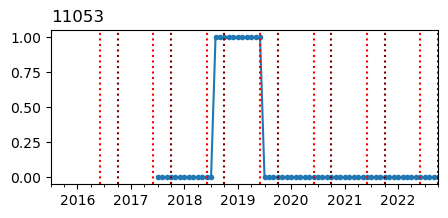

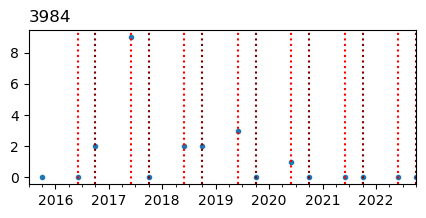

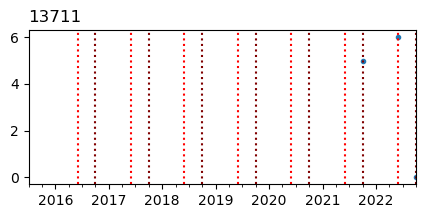

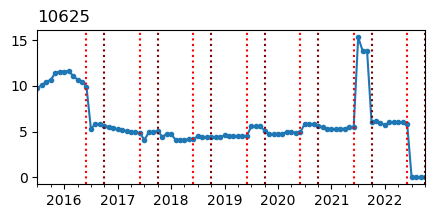

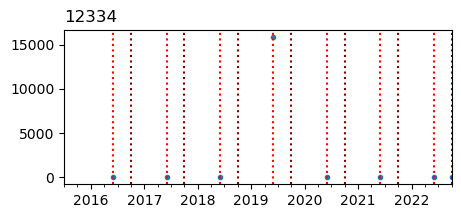

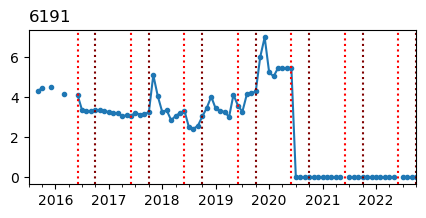

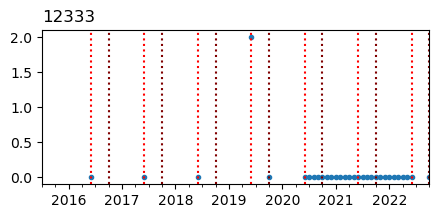

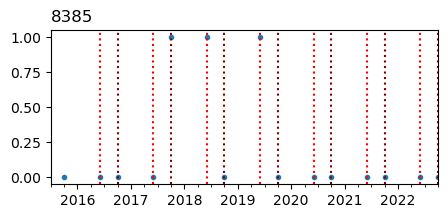

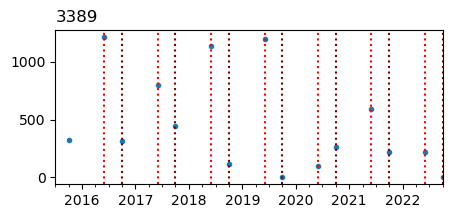

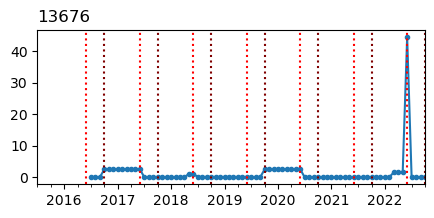

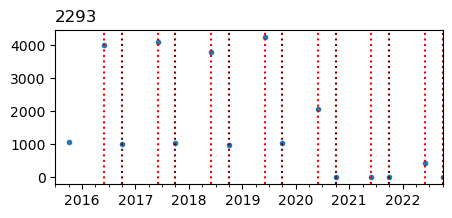

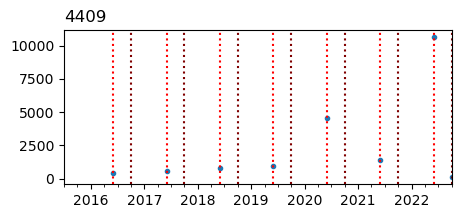

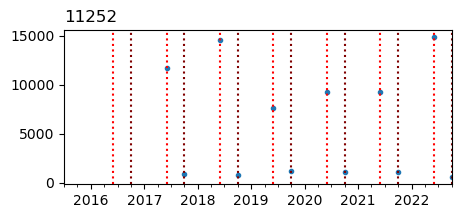

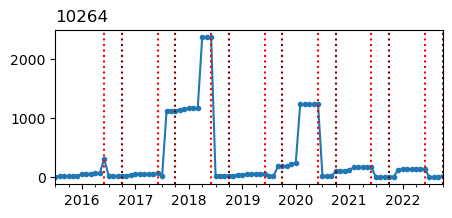

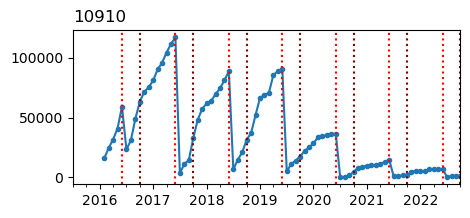

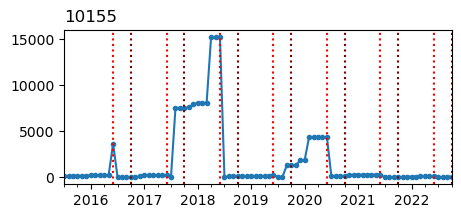

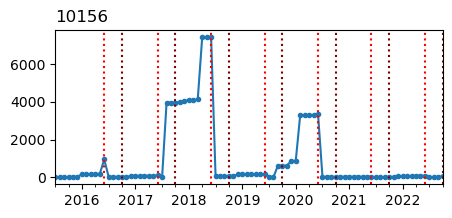

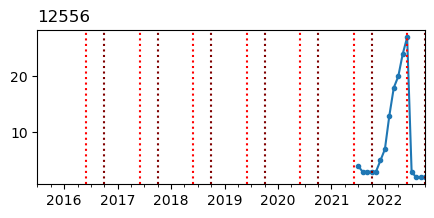

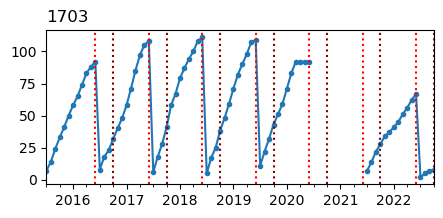

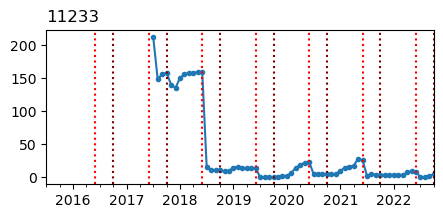

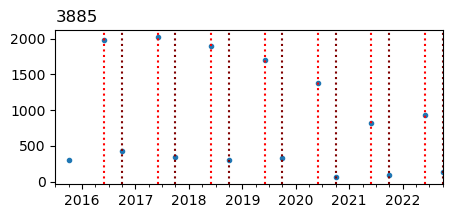

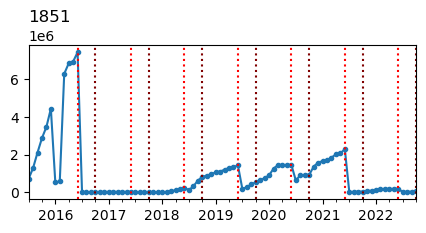

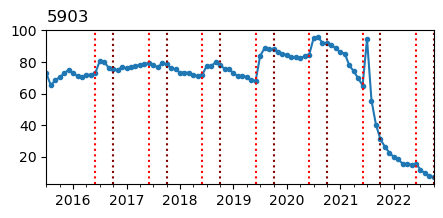

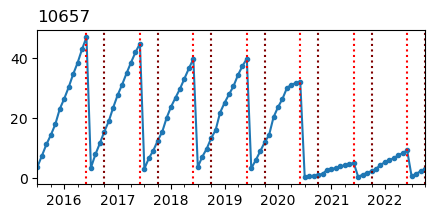

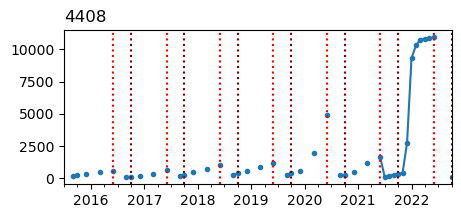

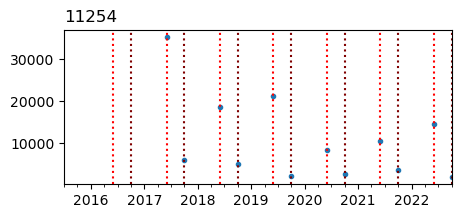

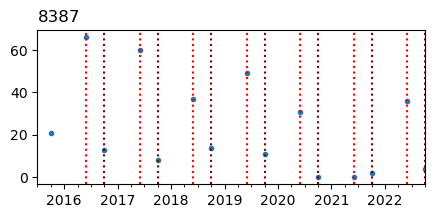

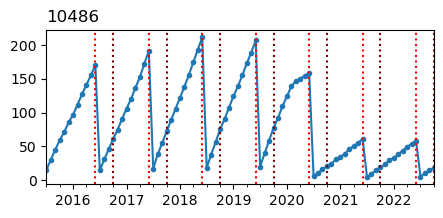

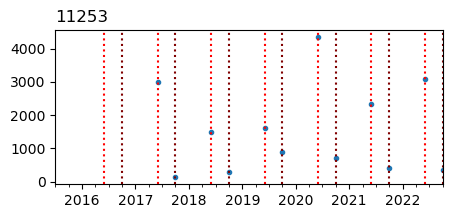

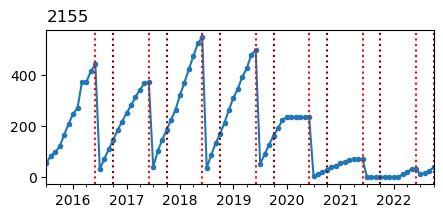

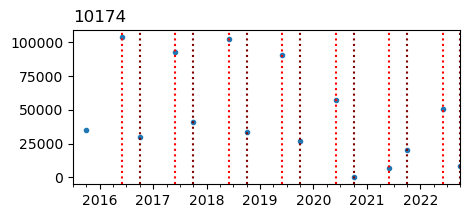

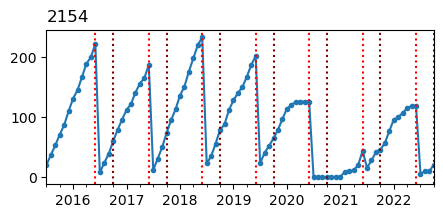

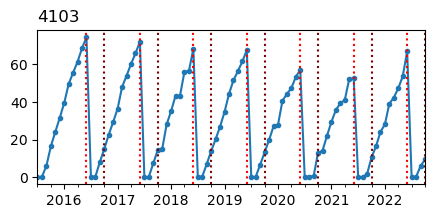

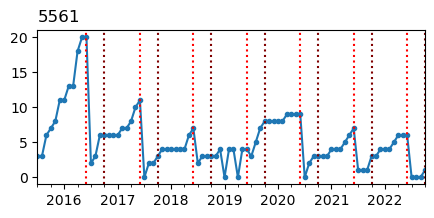

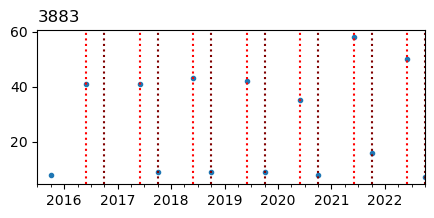

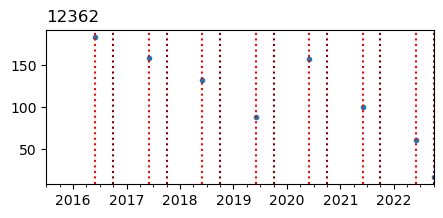

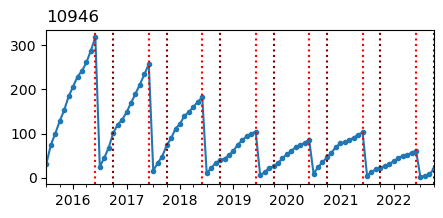

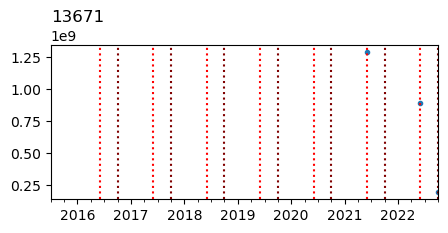

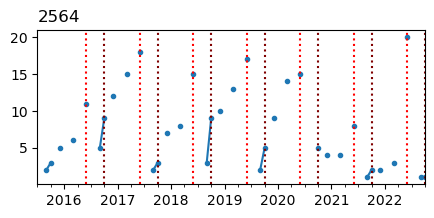

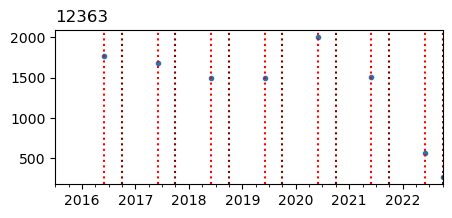

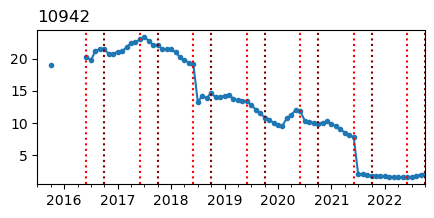

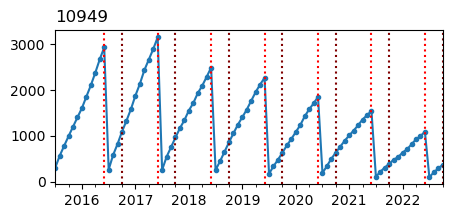

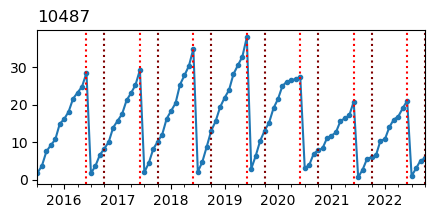

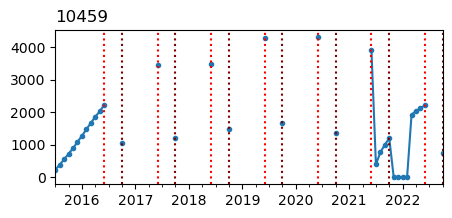

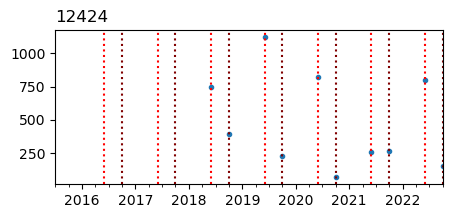

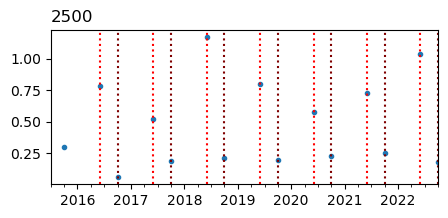

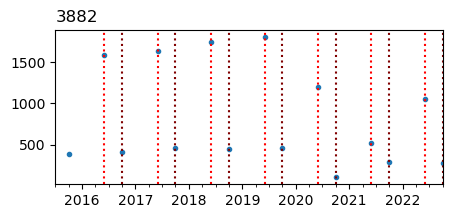

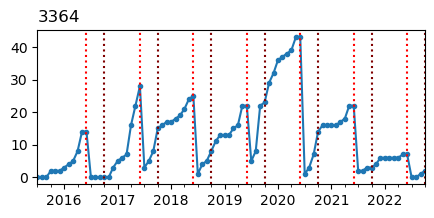

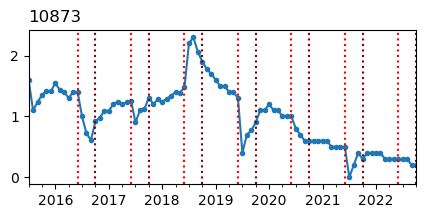

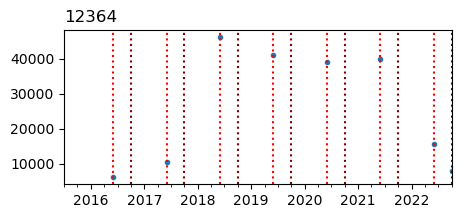

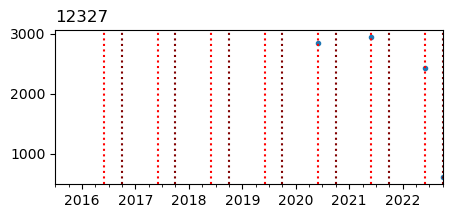

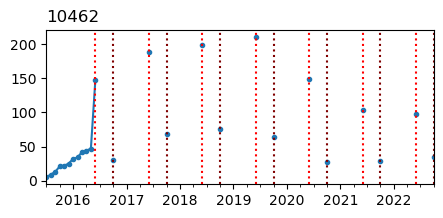

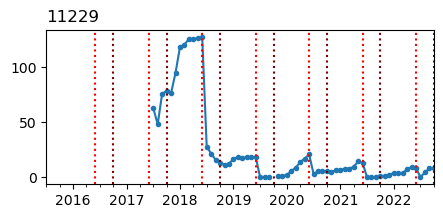

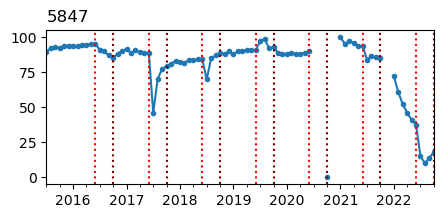

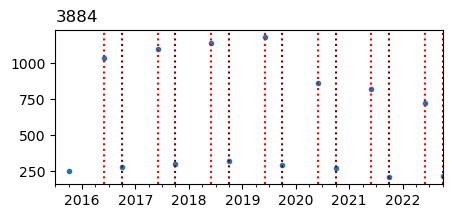

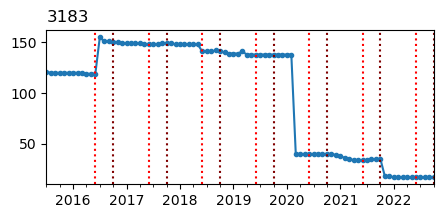

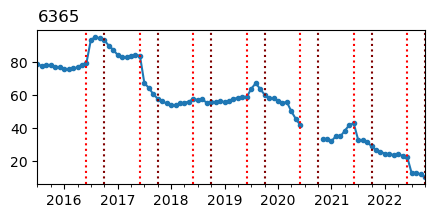

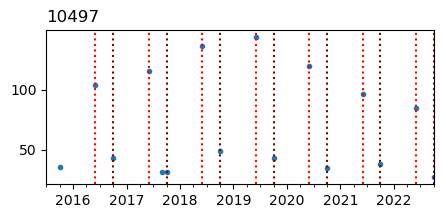

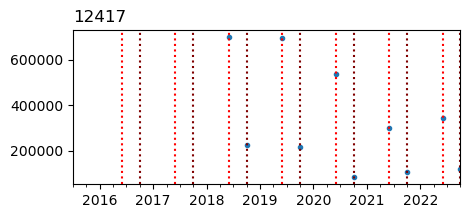

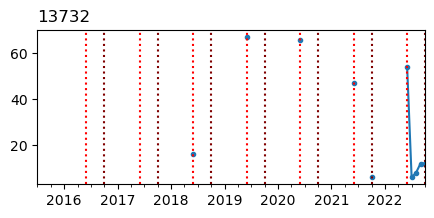

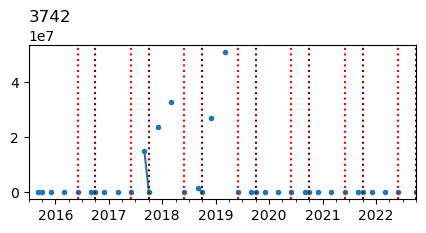

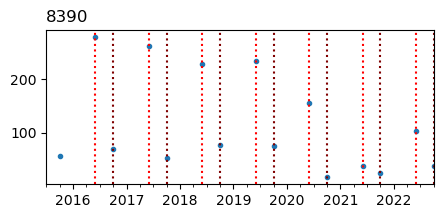

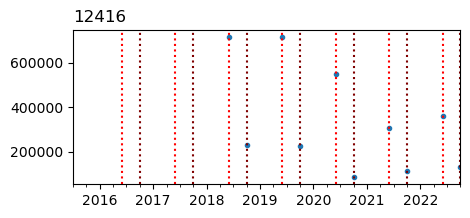

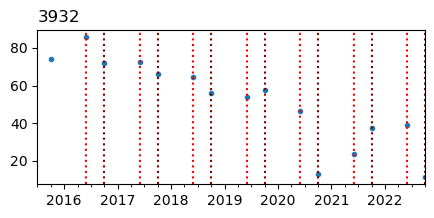

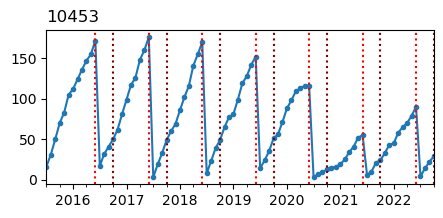

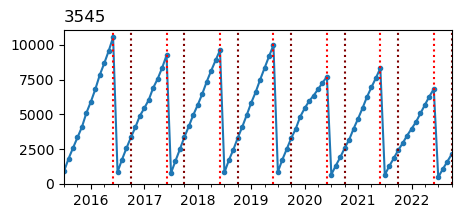

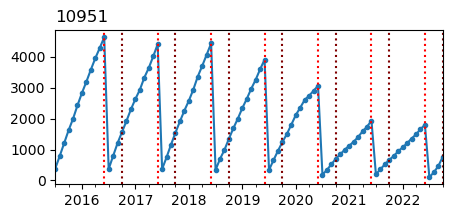

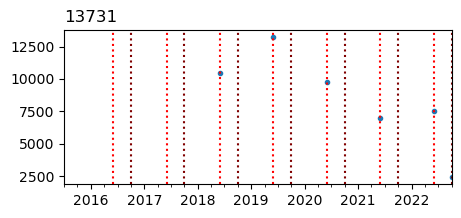

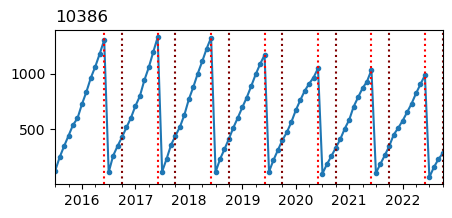

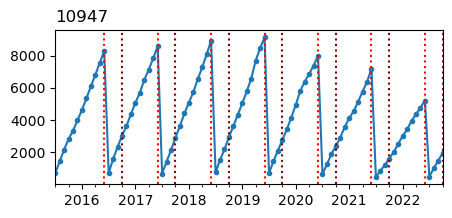

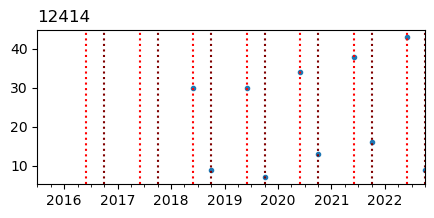

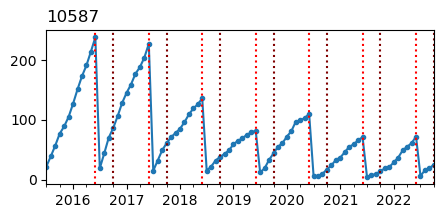

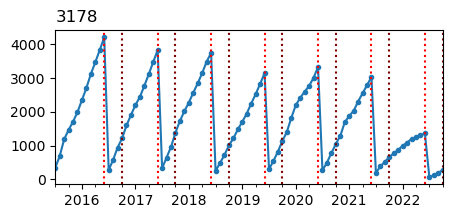

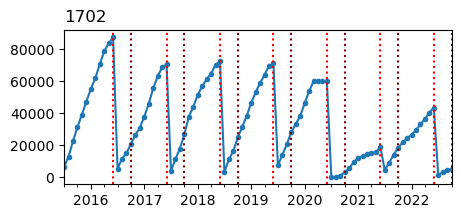

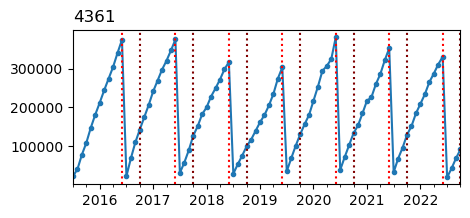

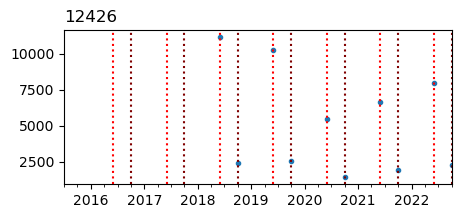

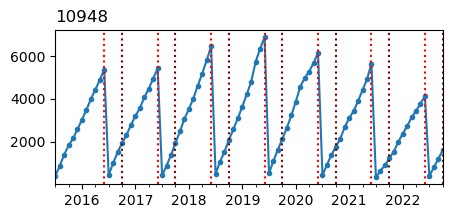

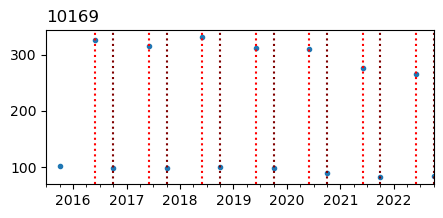

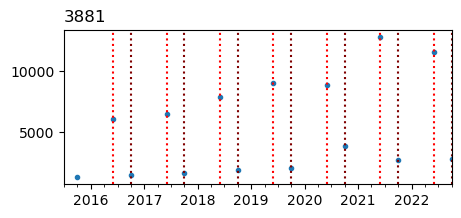

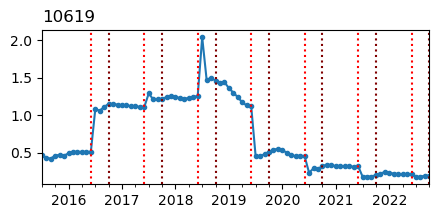

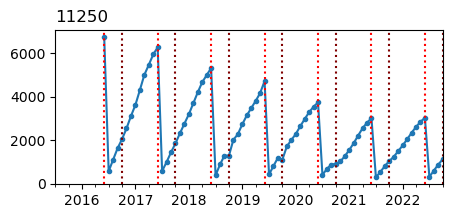

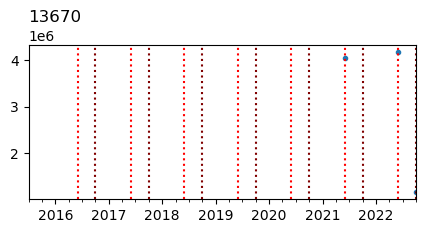

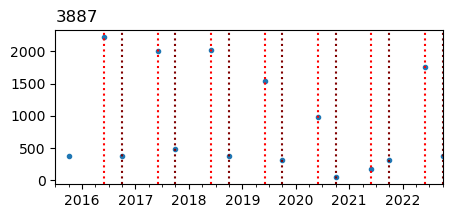

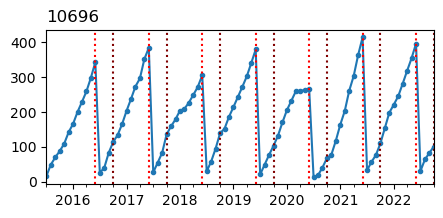

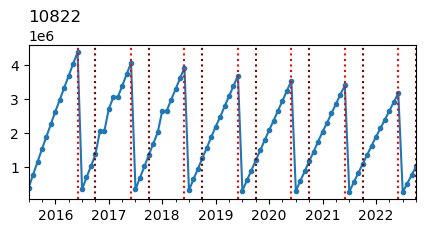

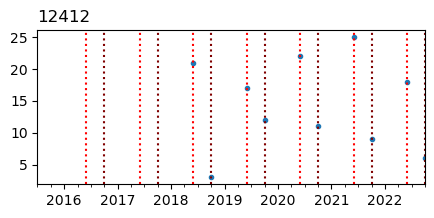

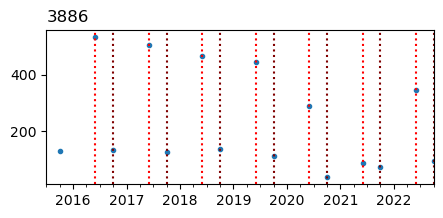

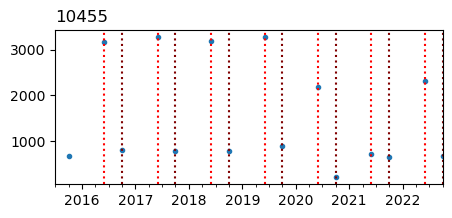

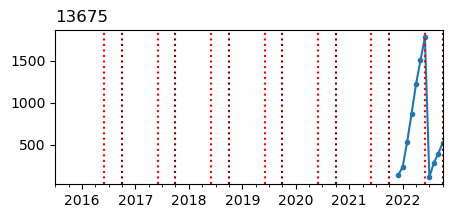

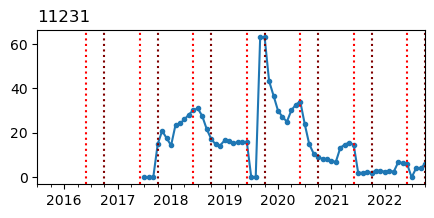

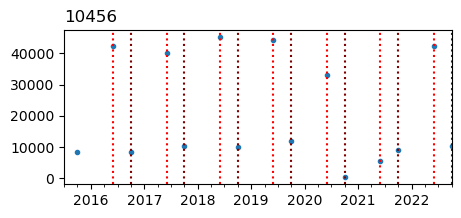

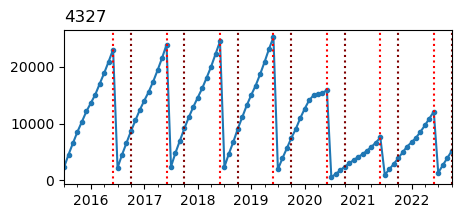

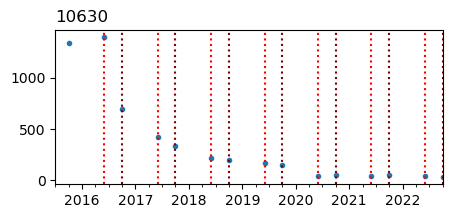

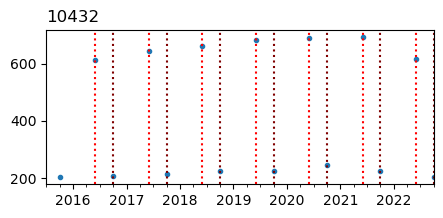

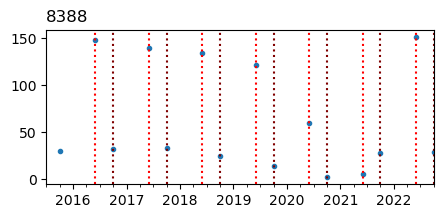

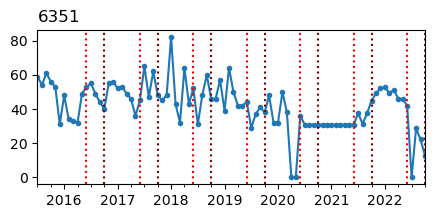

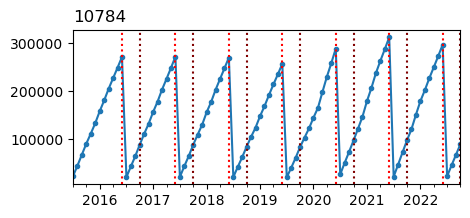

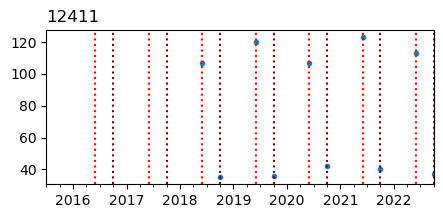

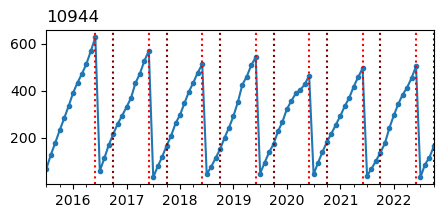

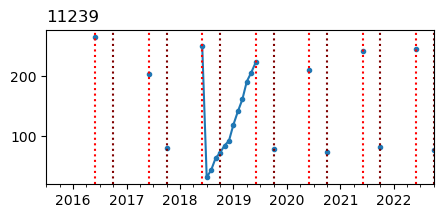

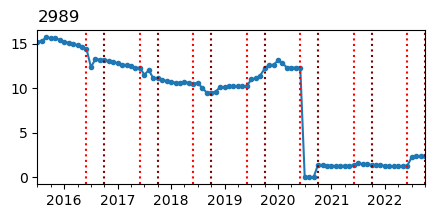

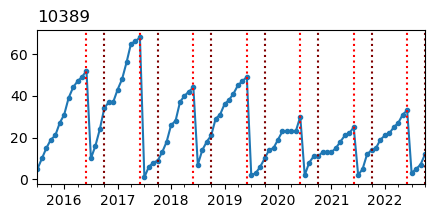

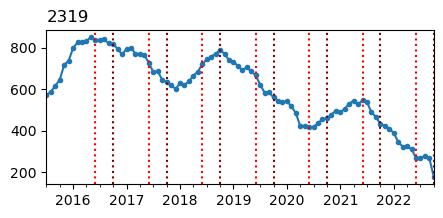

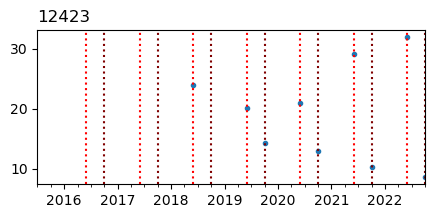

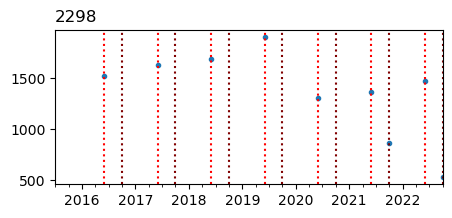

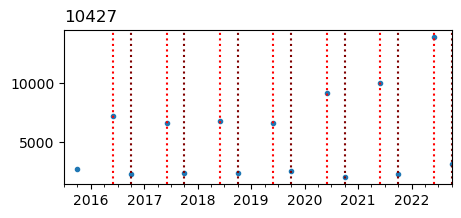

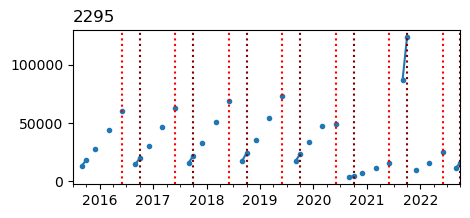

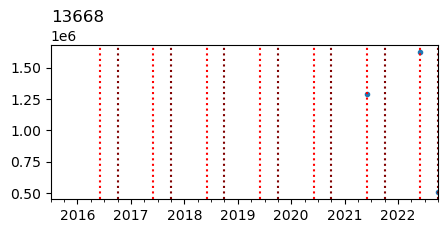

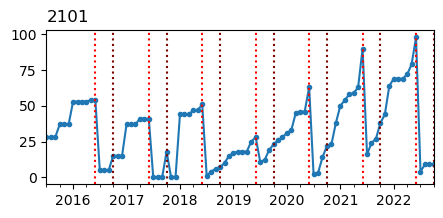

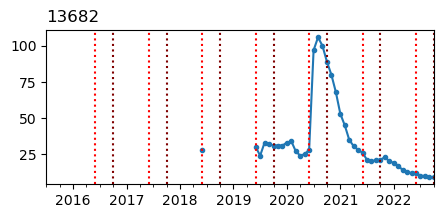

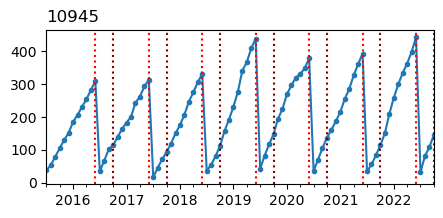

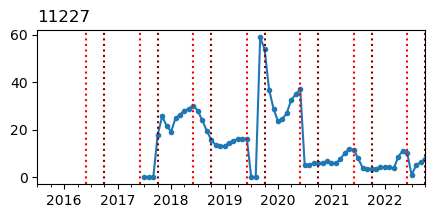

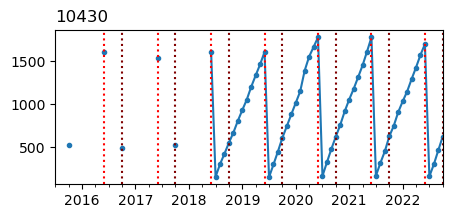

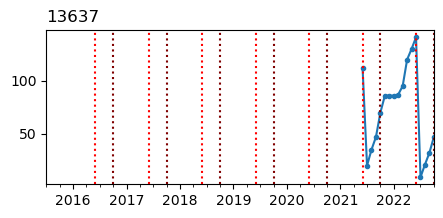

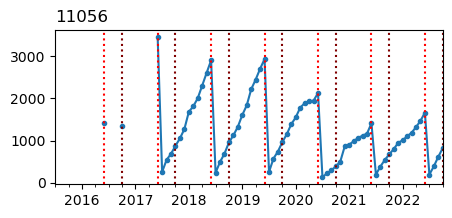

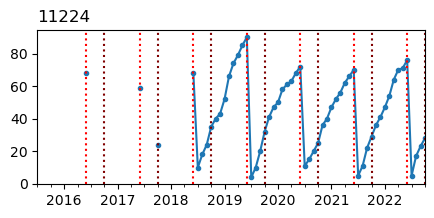

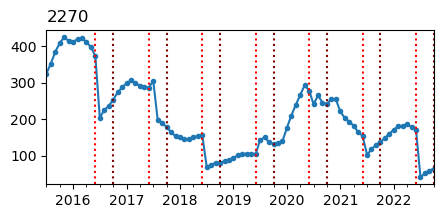

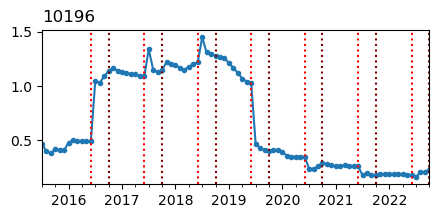

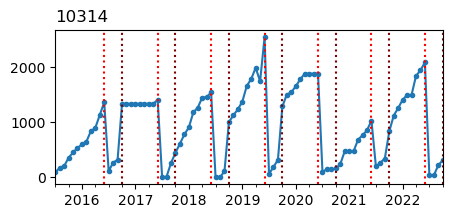

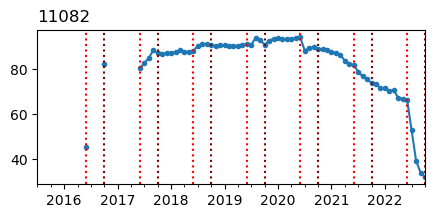

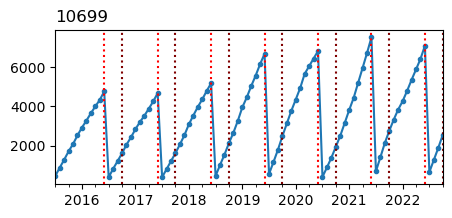

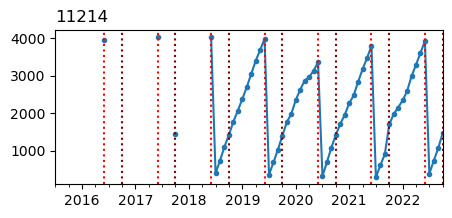

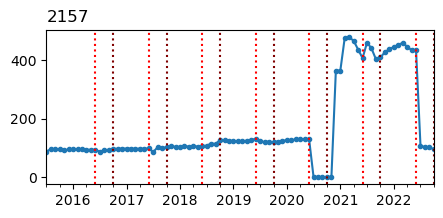

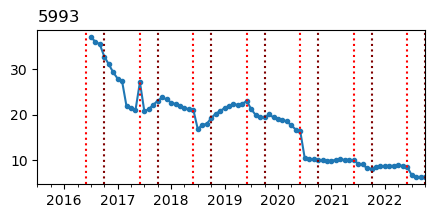

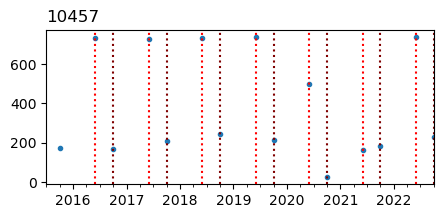

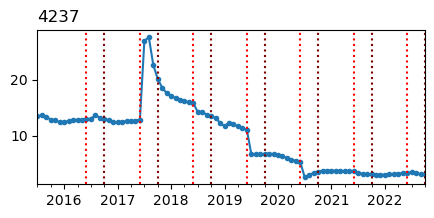

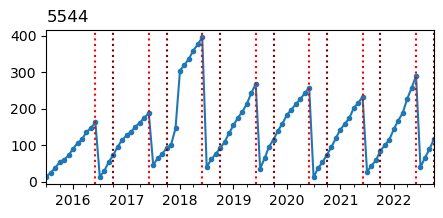

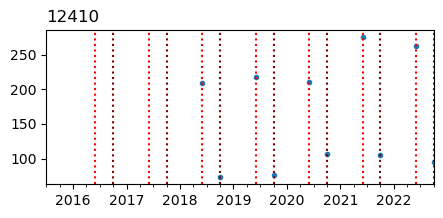

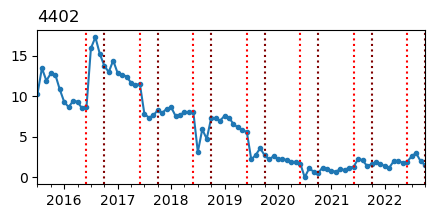

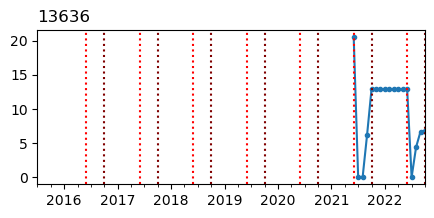

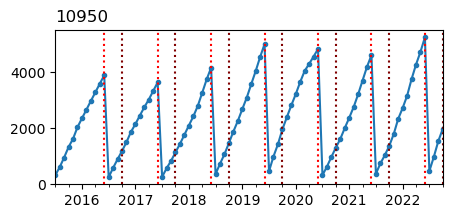

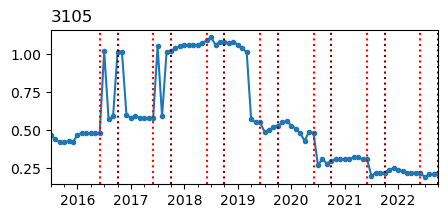

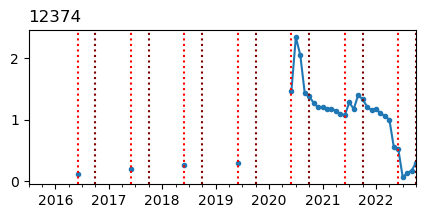

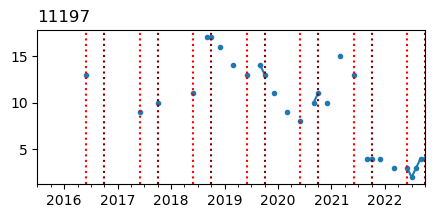

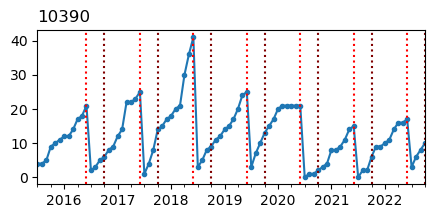

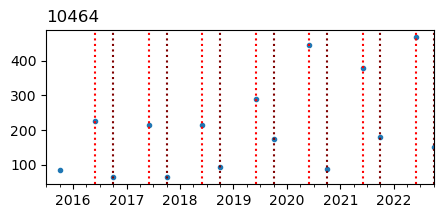

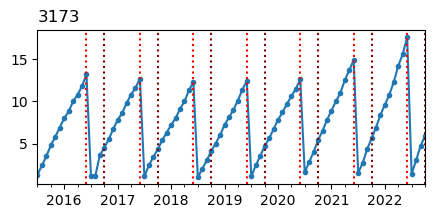

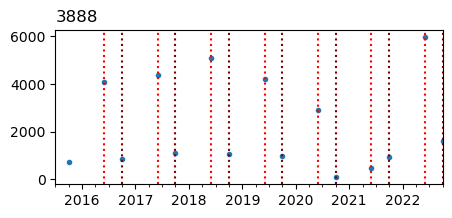

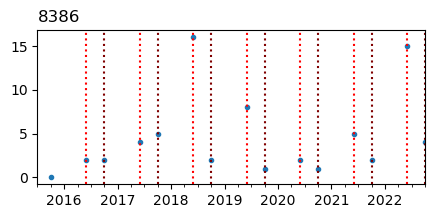

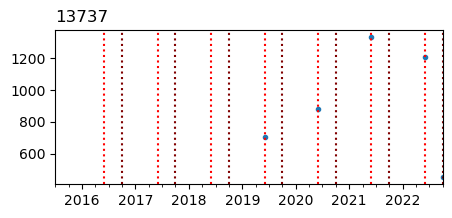

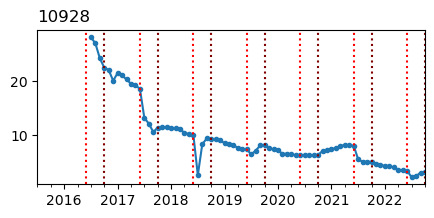

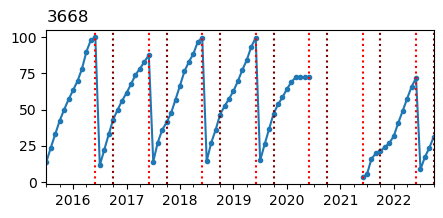

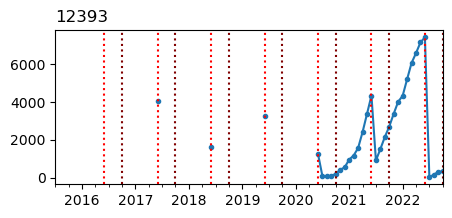

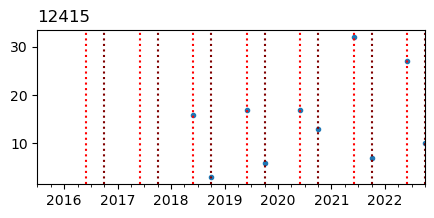

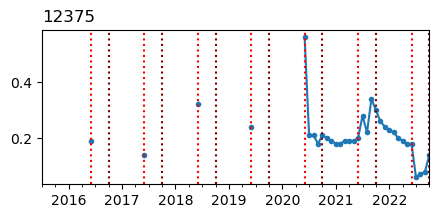

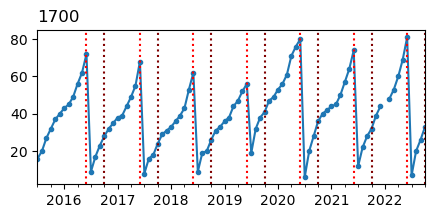

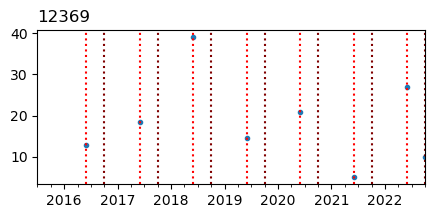

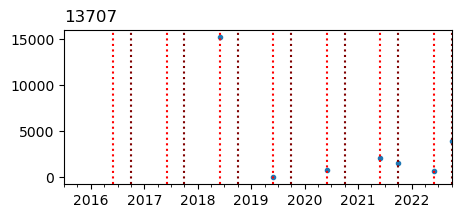

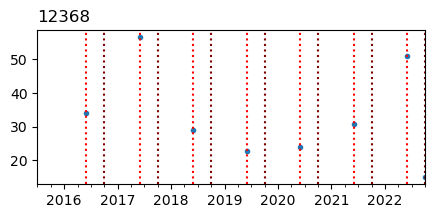

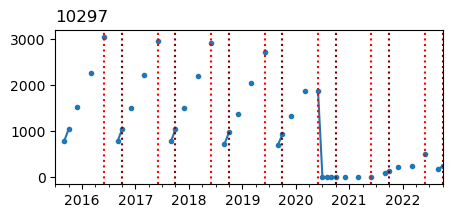

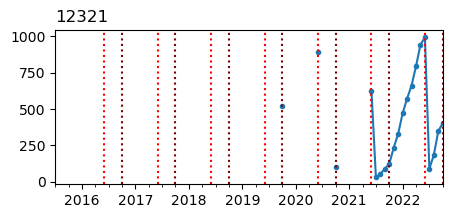

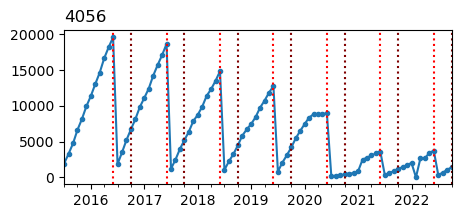

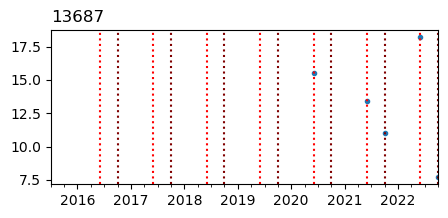

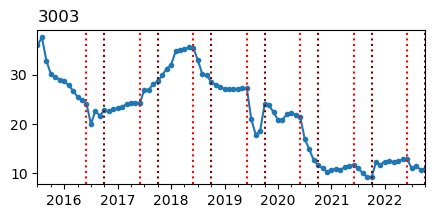

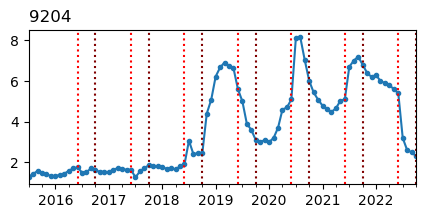

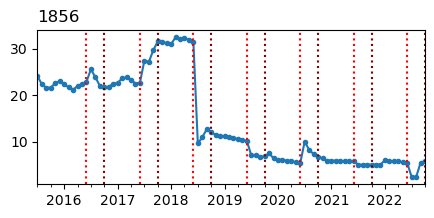

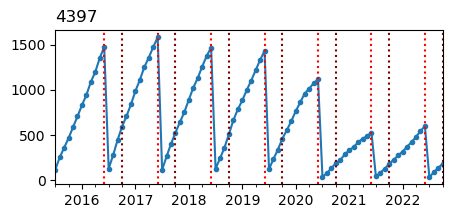

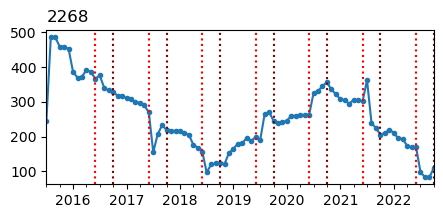

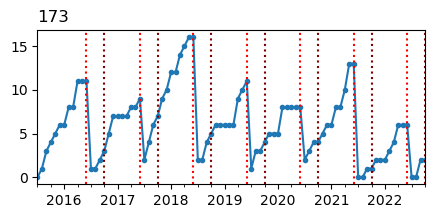

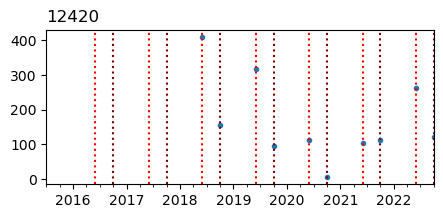

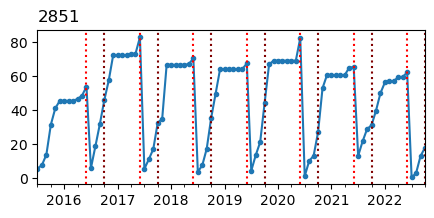

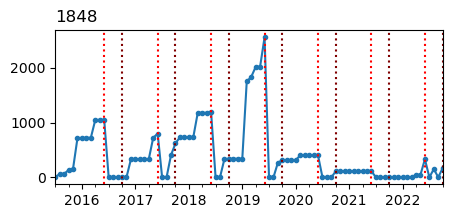

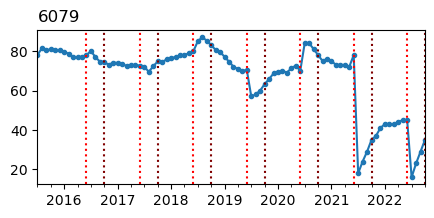

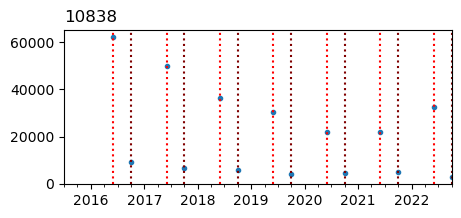

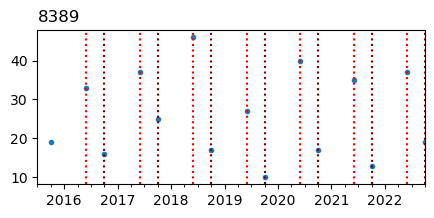

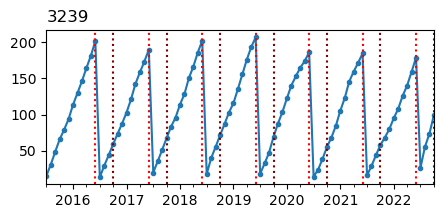

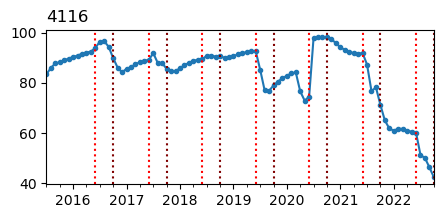

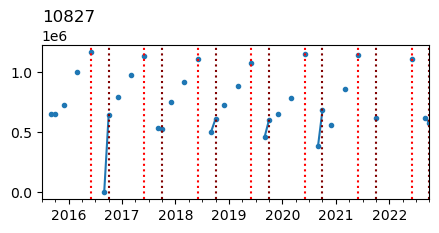

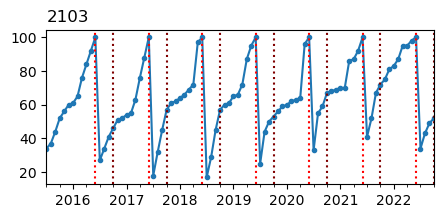

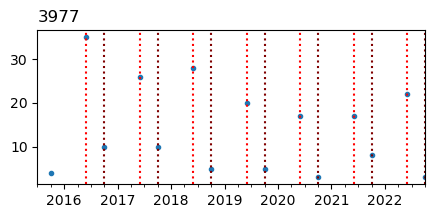

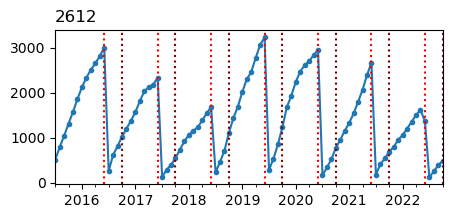

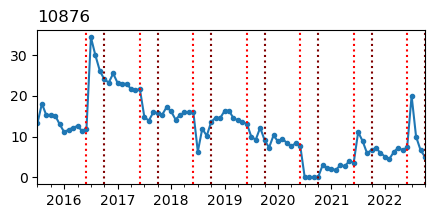

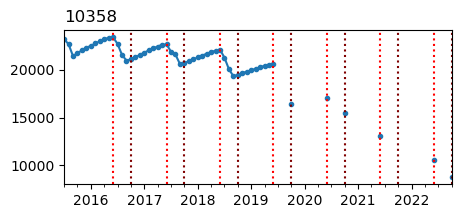

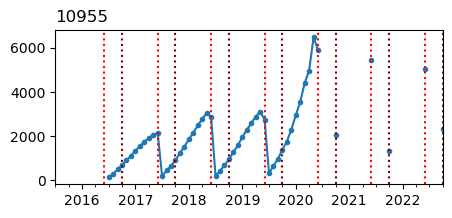

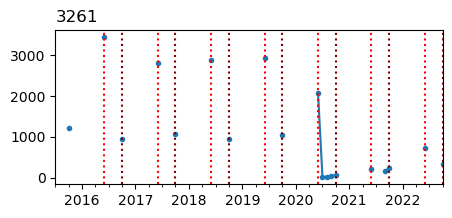

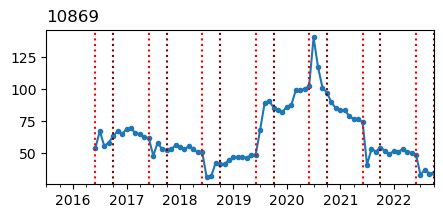

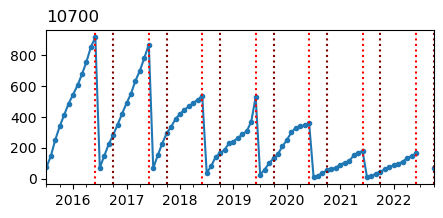

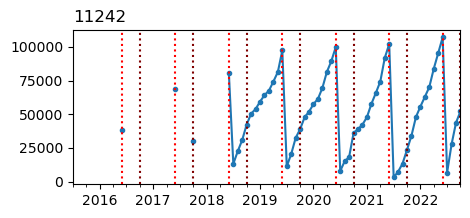

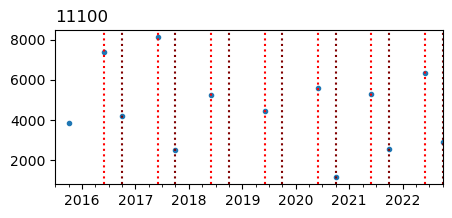

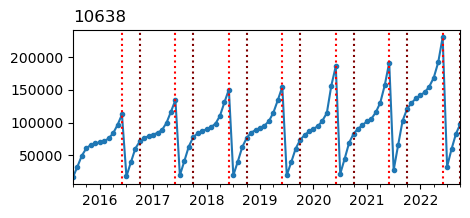

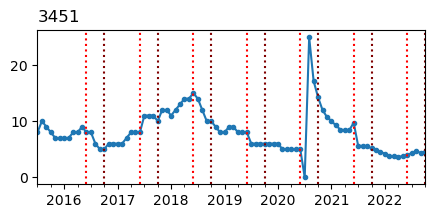

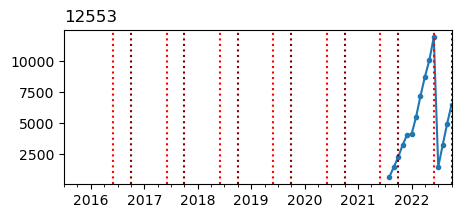

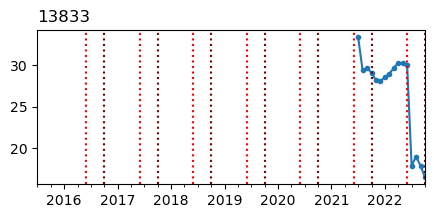

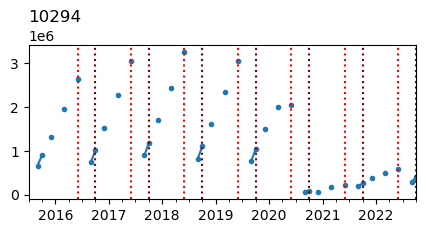

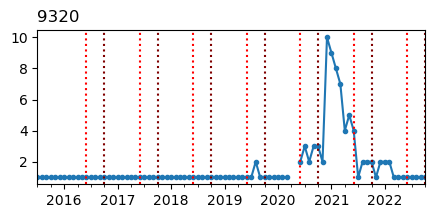

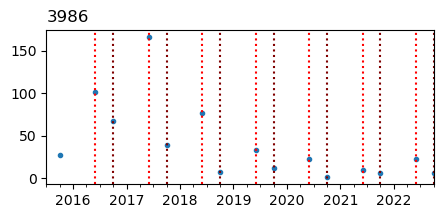

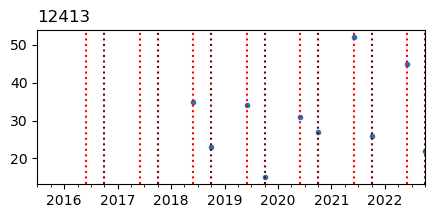

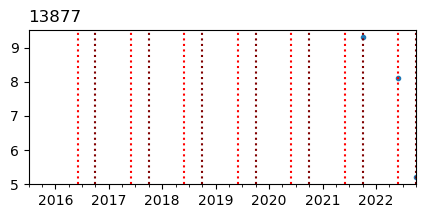

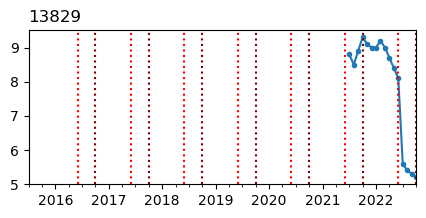

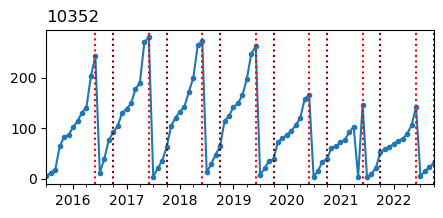

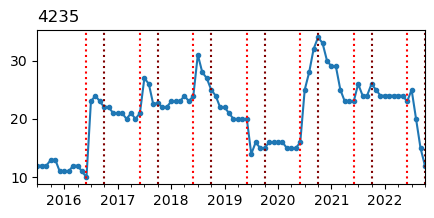

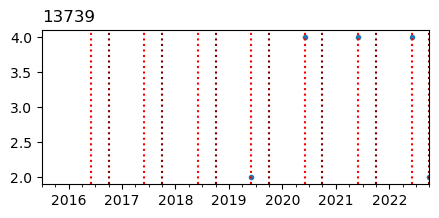

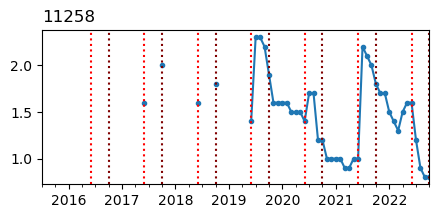

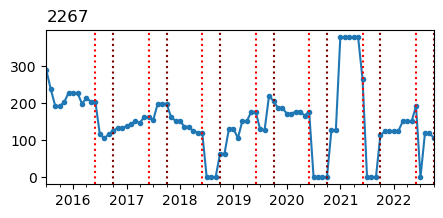

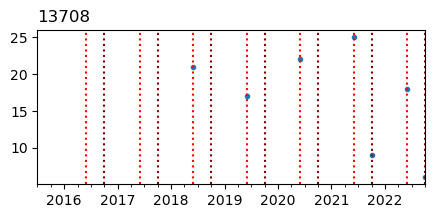

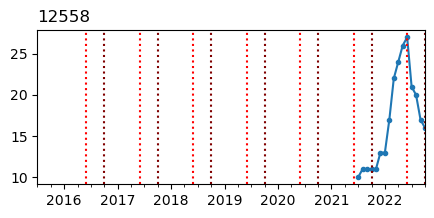

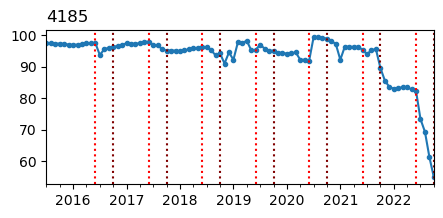

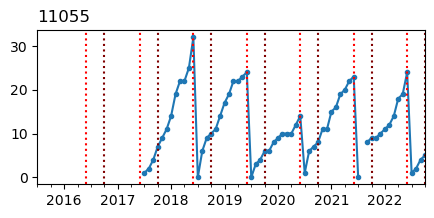

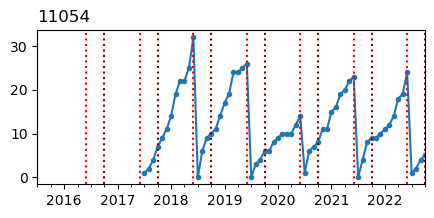

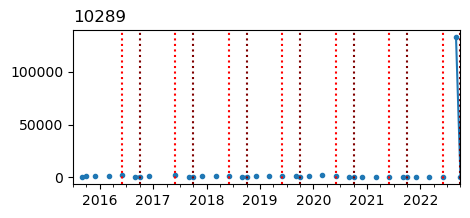

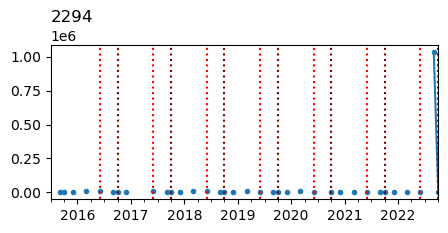

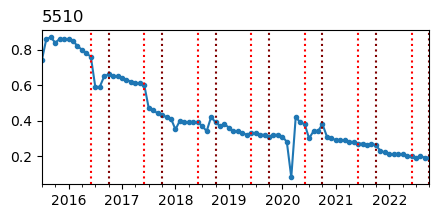

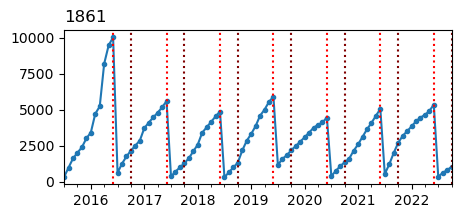

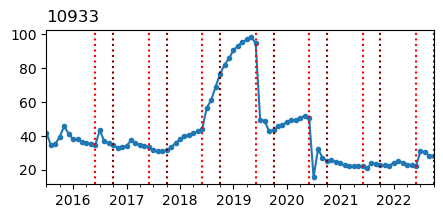

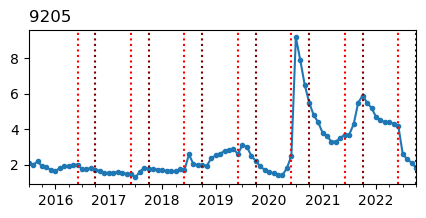

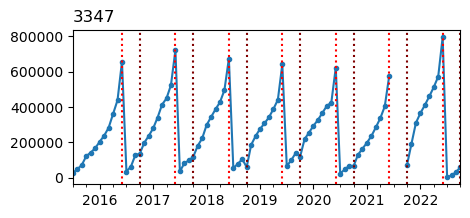

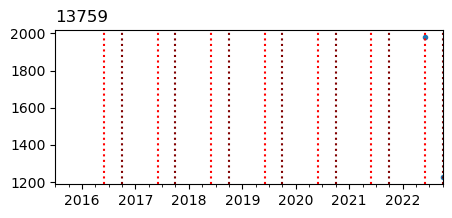

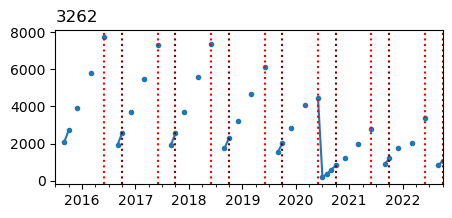

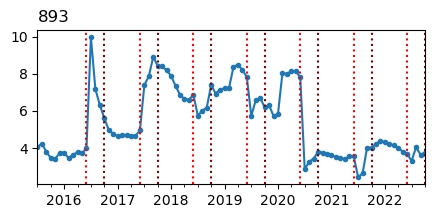

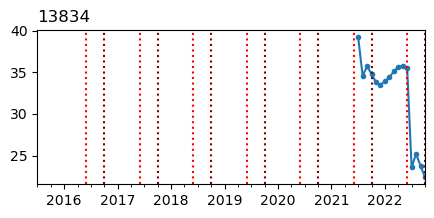

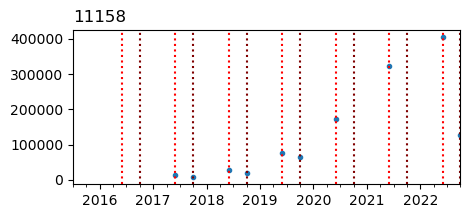

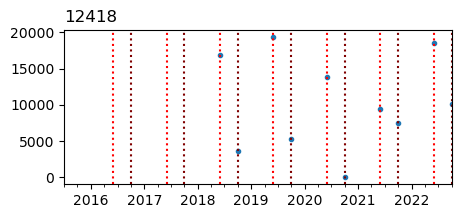

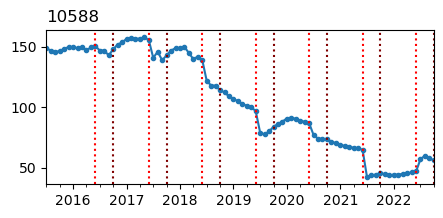

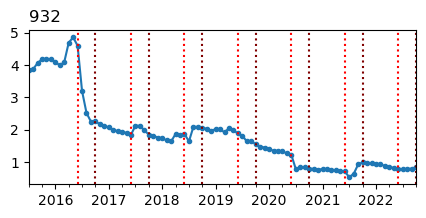

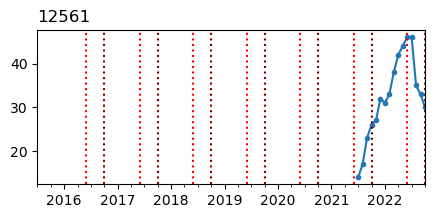

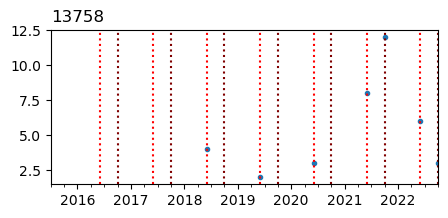

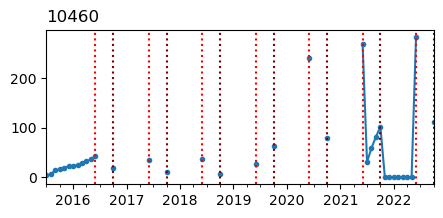

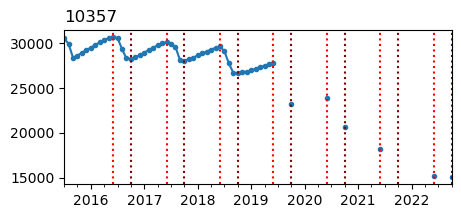

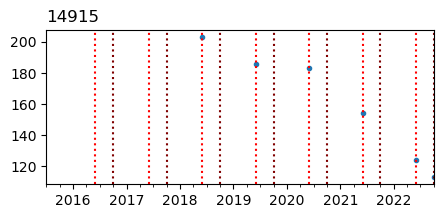

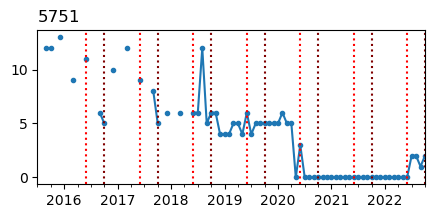

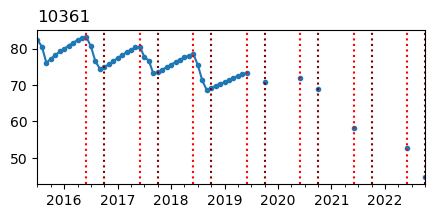

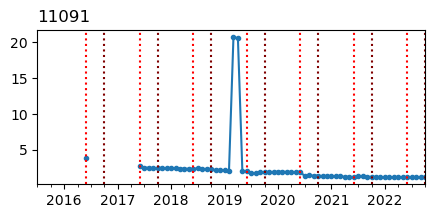

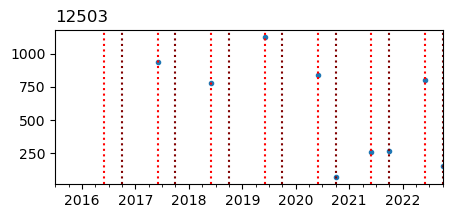

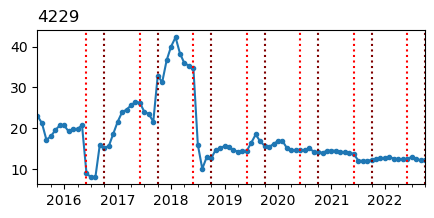

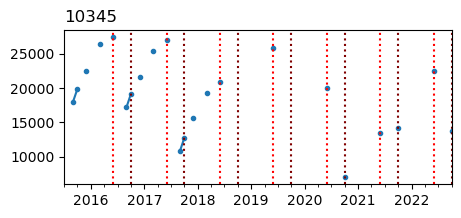

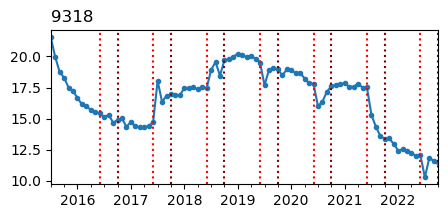

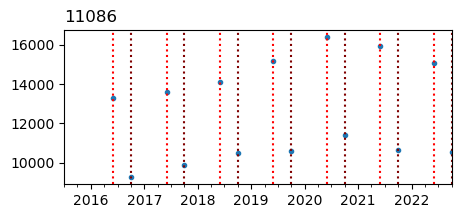

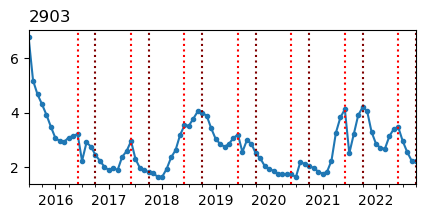

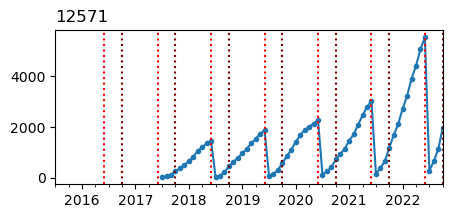

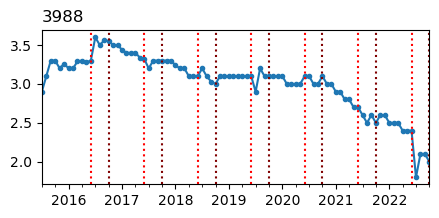

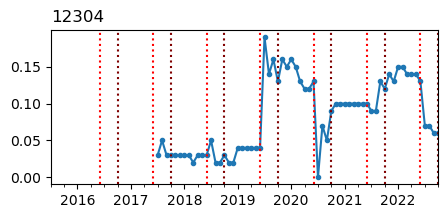

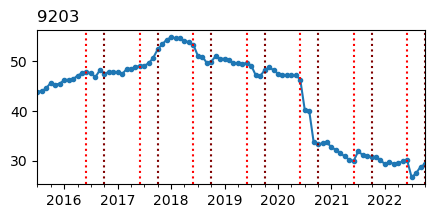

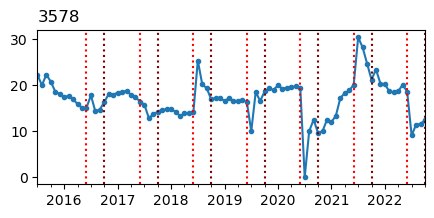

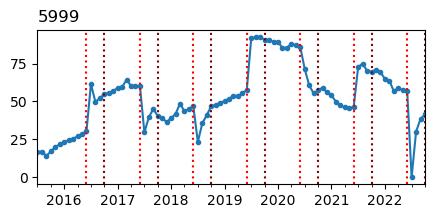

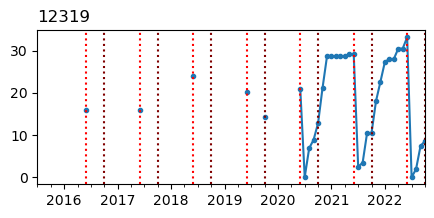

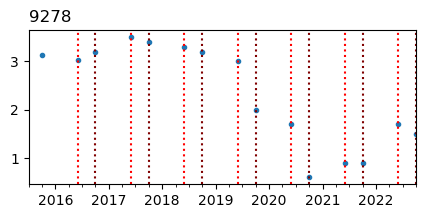

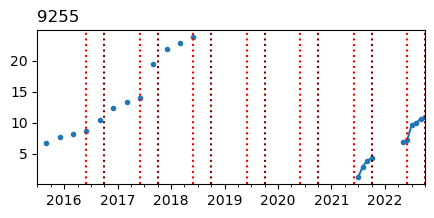

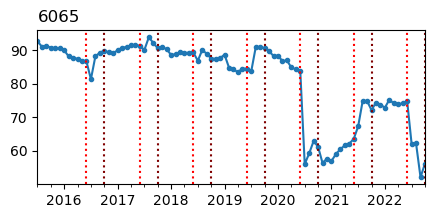

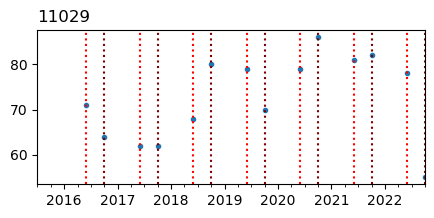

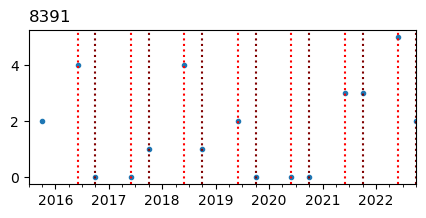

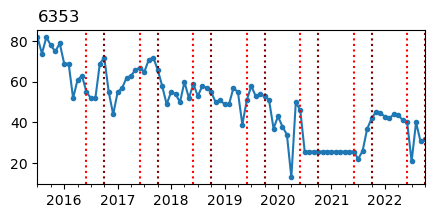

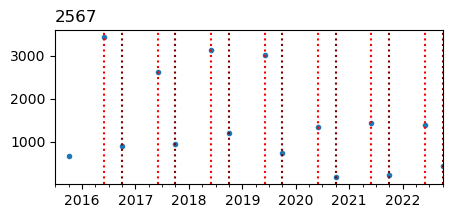

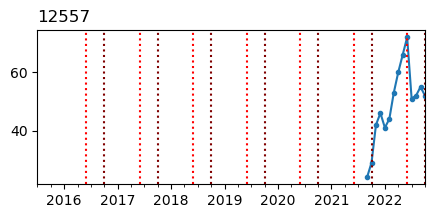

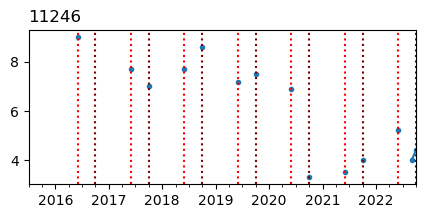

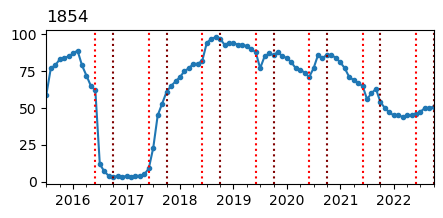

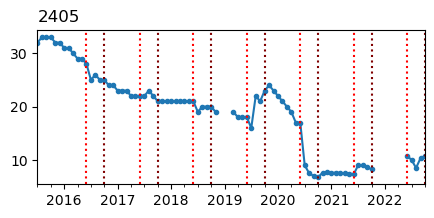

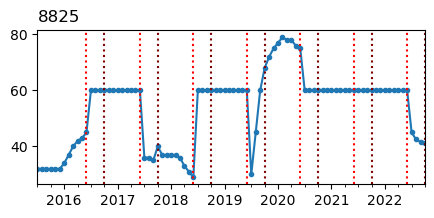

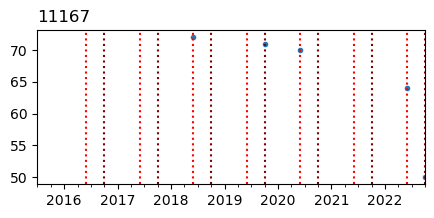

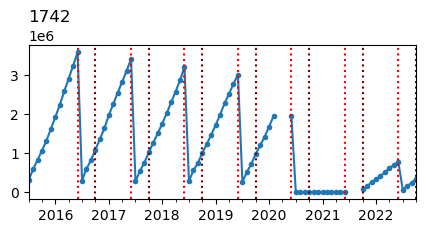

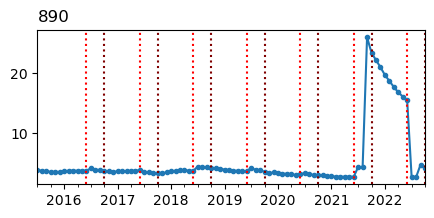

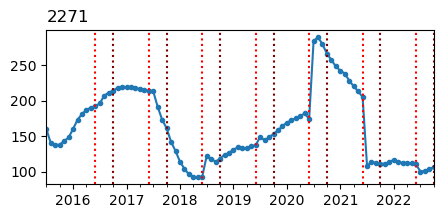

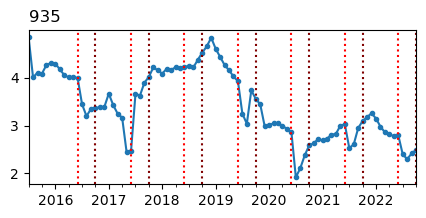

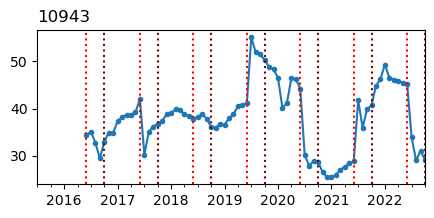

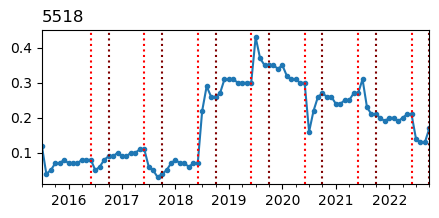

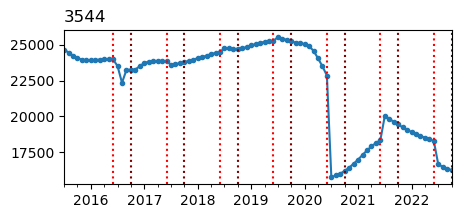

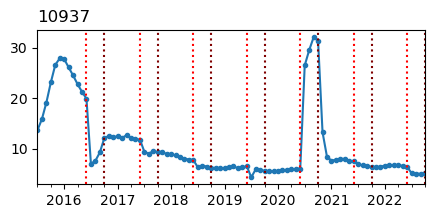

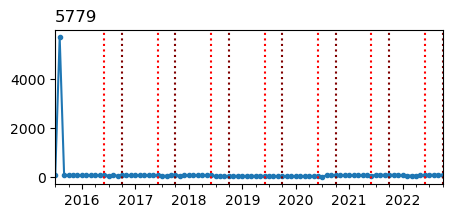

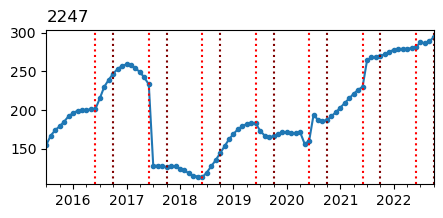

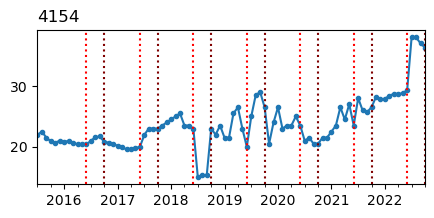

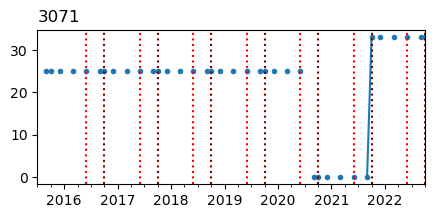

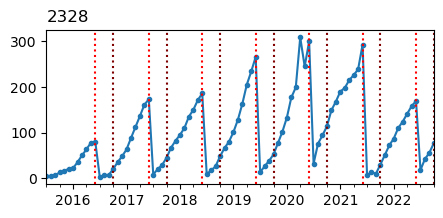

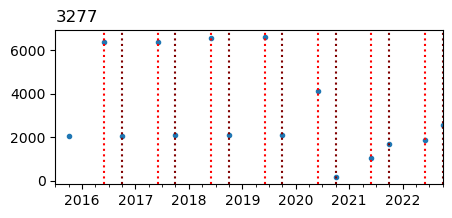

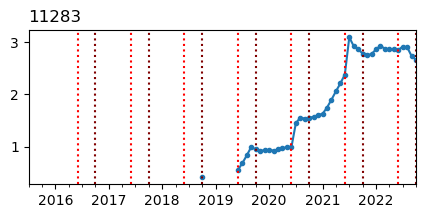

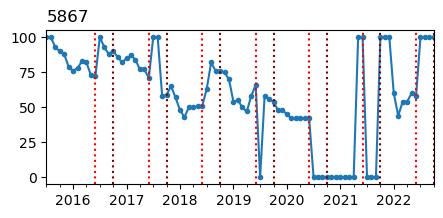

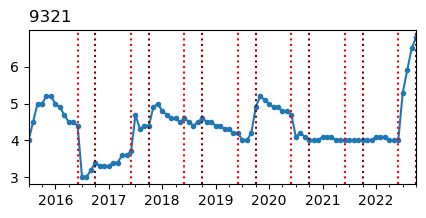

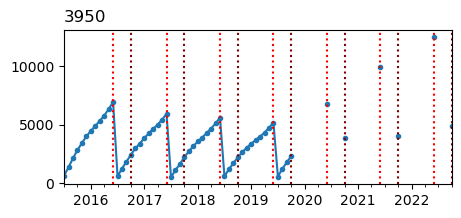

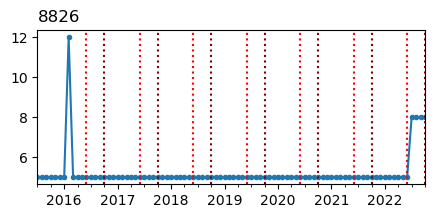

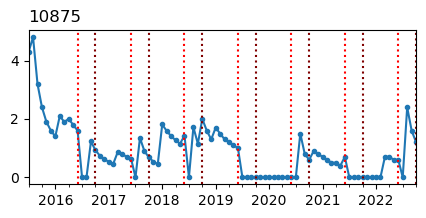

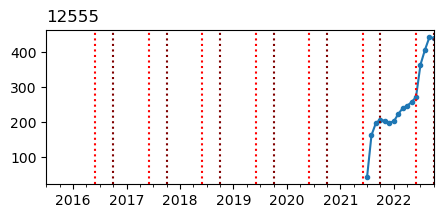

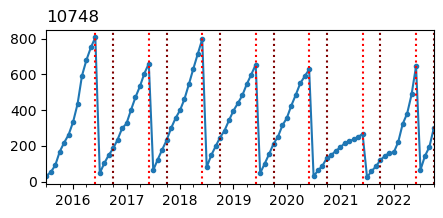

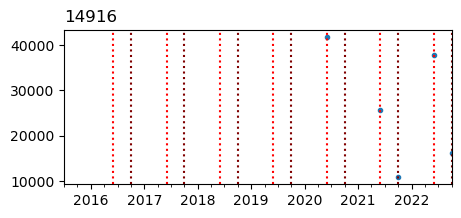

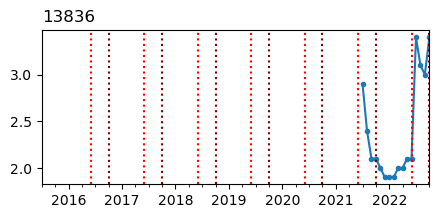

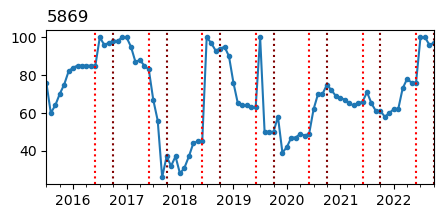

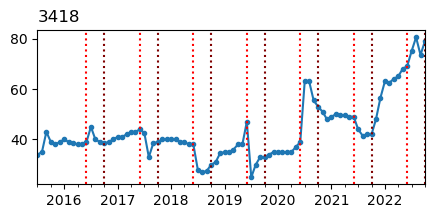

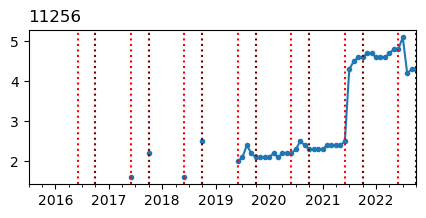

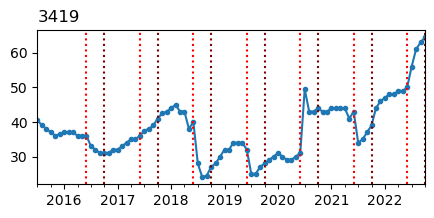

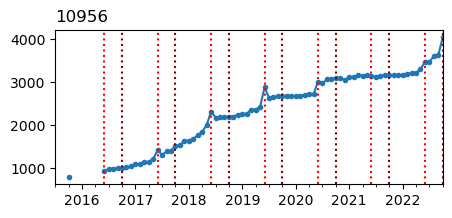

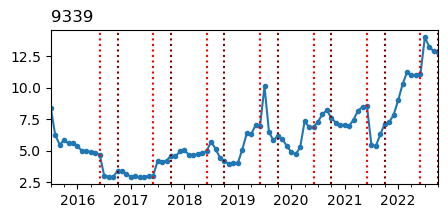

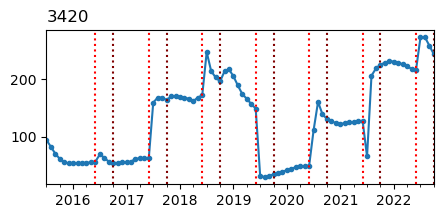

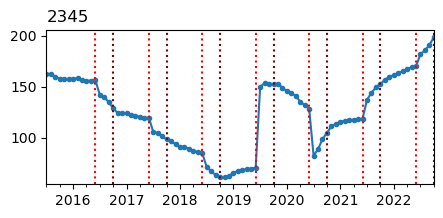

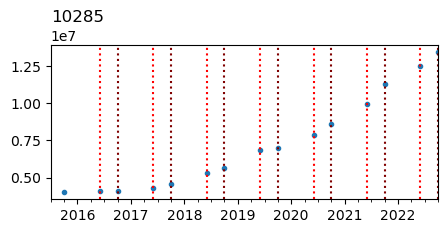

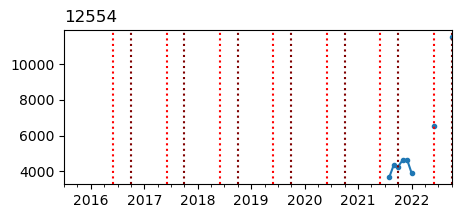

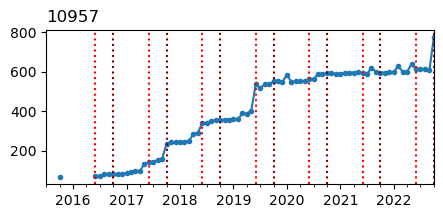

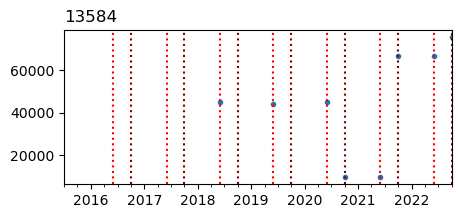

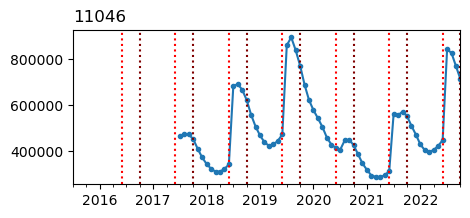

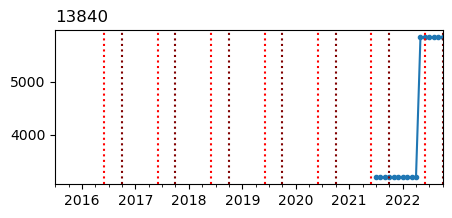

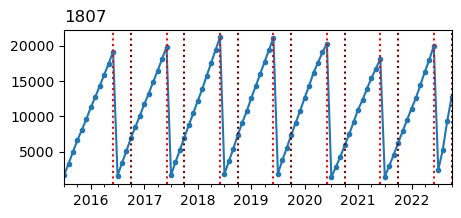

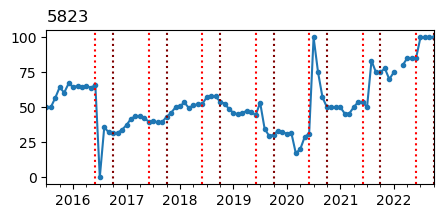

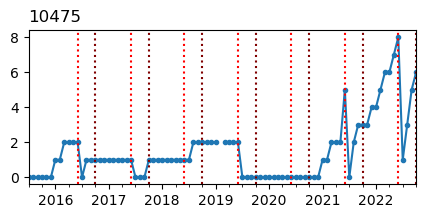

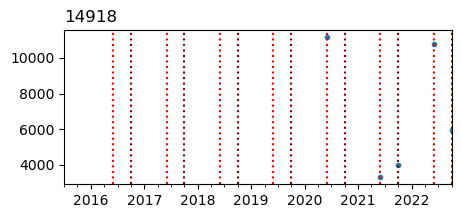

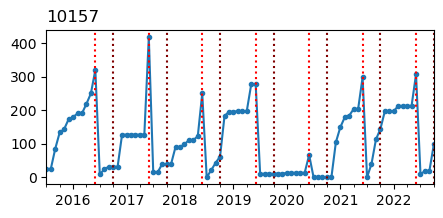

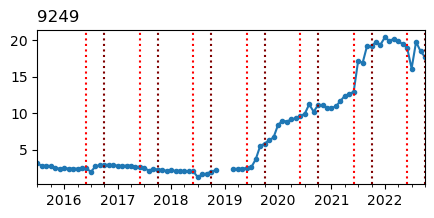

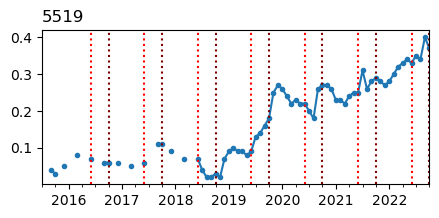

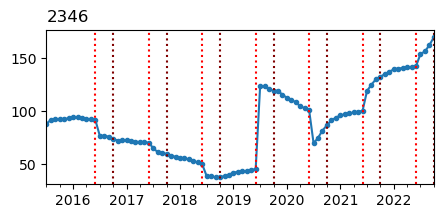

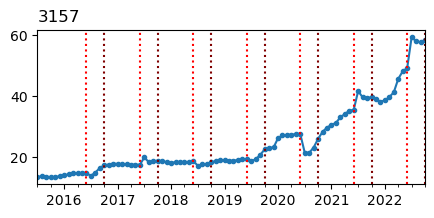

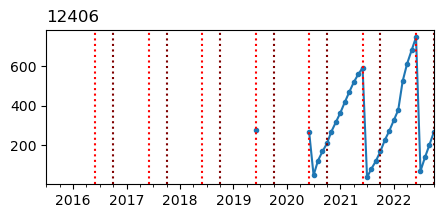

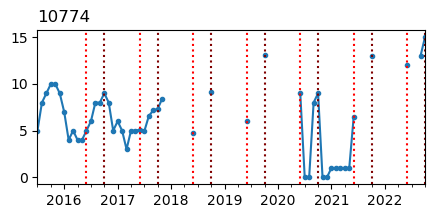

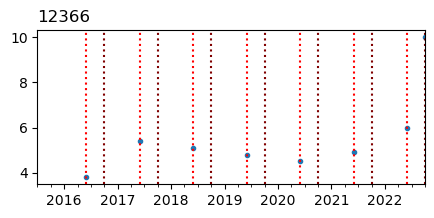

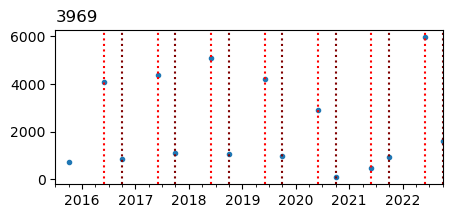

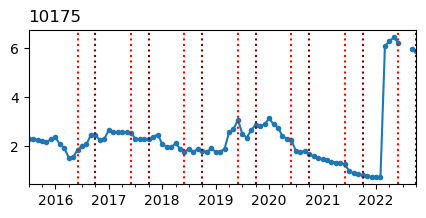

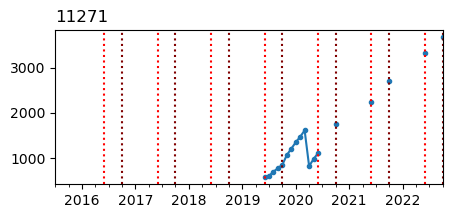

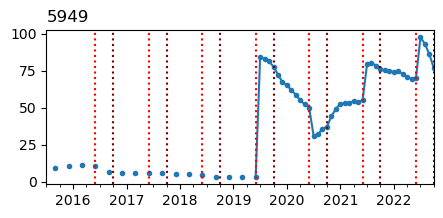

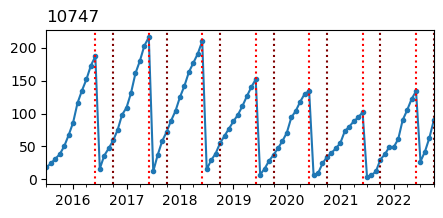

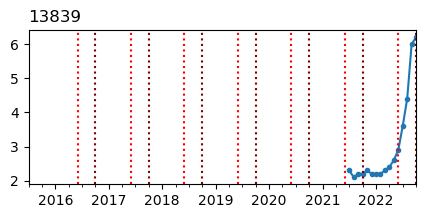

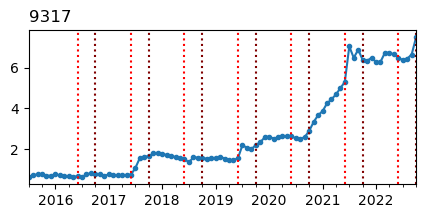

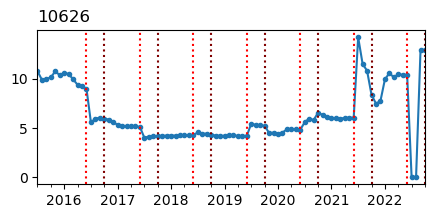

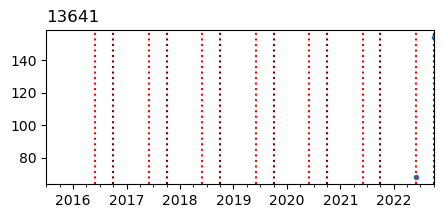

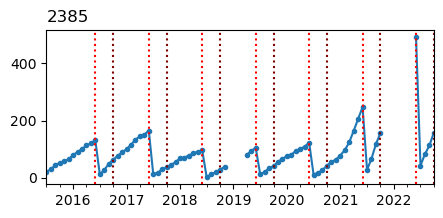

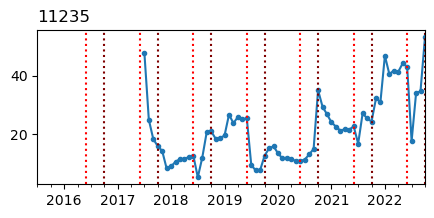

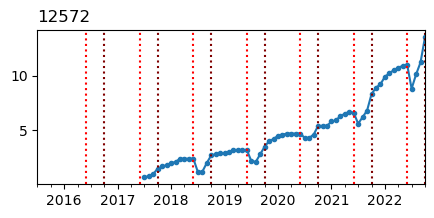

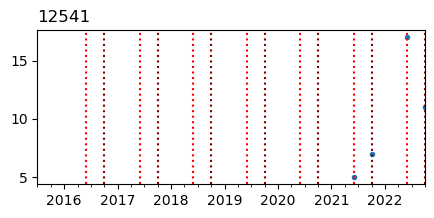

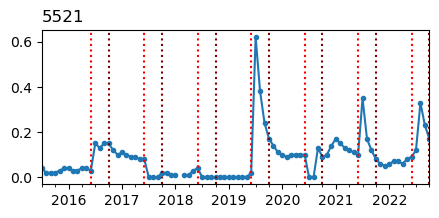

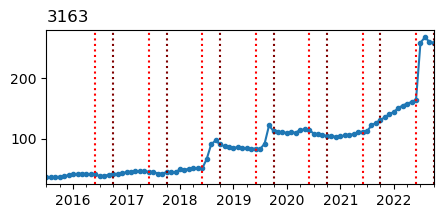

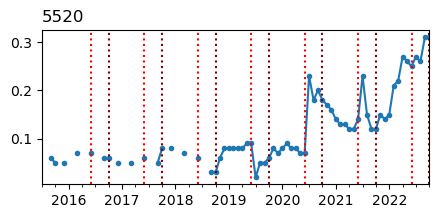

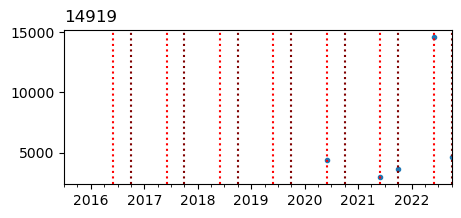

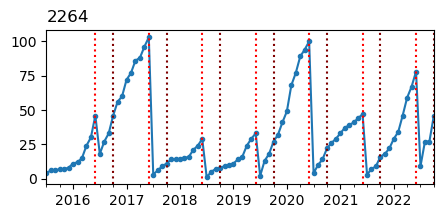

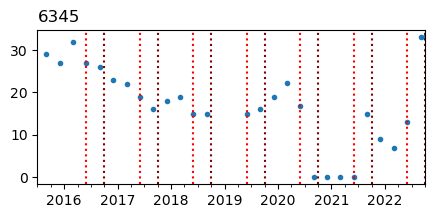

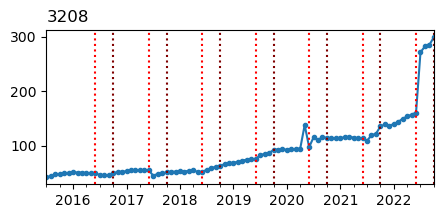

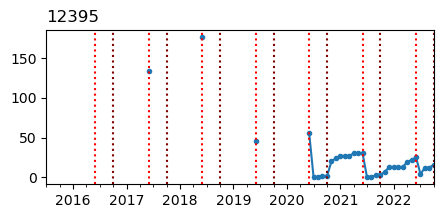

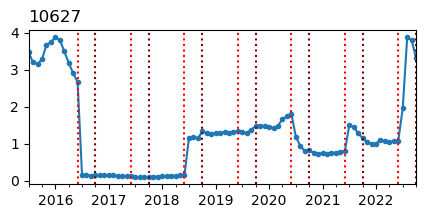

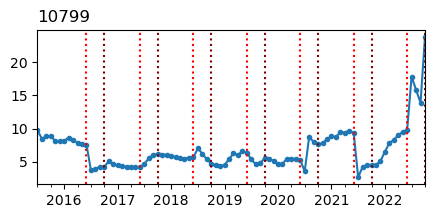

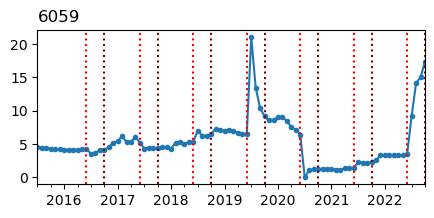

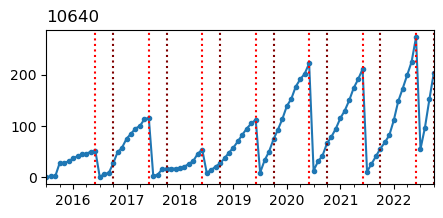

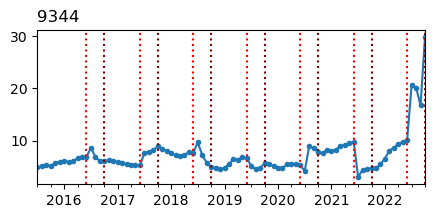

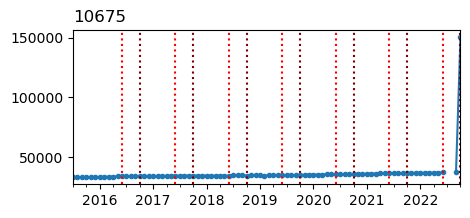

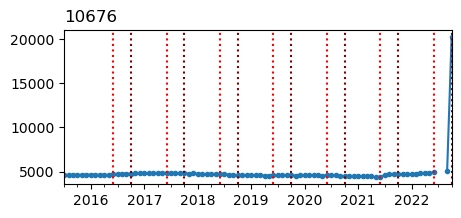

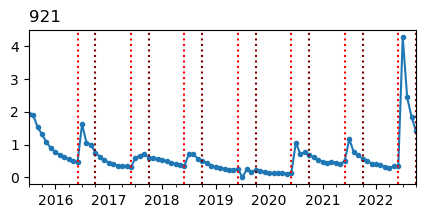

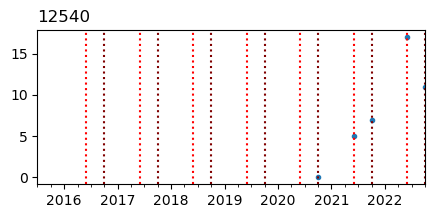

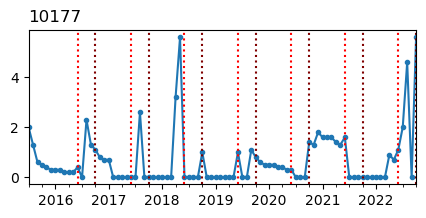

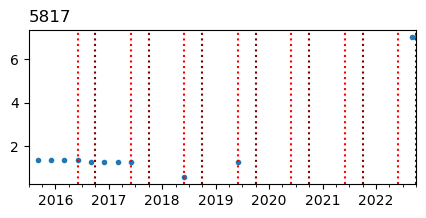

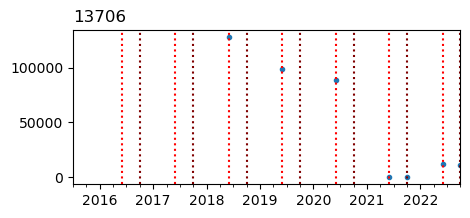

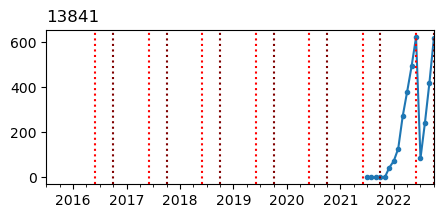

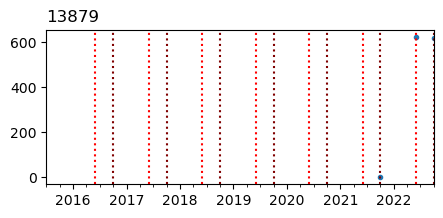

In [90]:
for i, row in maybe_bad_indicators.iterrows():

    row_id = row['ID']

    ax = (
        indicators_full[
            indicators_full['ID'] == row_id
        ]
        .sort_values(by='Value Date', ascending=False)
        .set_index('Value Date')
        ['Accepted Value YTD']
        .plot(
            figsize=(5,2),
            kind='line',
            marker='.'
        )
    )

    for year in range(2016,2023):
        plt.axvline(f'{year}-10-01', 0, 1, ls=':', color='maroon')
        plt.axvline(f'{year}-06-01', 0, 1, ls=':', color='red')

    plt.title(row_id, loc='left')
    ax.set(xlabel=None)
    plt.show()

#### check speicifically ones that are marked as 'Percentage' type

In [93]:
maybe_bad_indicators[
    (maybe_bad_indicators['Additive']) & 
    (maybe_bad_indicators['Measurement Type'] == 'Percentage')
]

2023  2022  2021  2020  2019  2018  Target_MMR  Accepted_Value_YTD  \
453   31.4  71.7   3.3  72.3  99.5  99.5       100.0                31.4   
1108  16.5  30.0   NaN   NaN   NaN   NaN        75.0                16.5   
1109  22.4  35.5   NaN   NaN   NaN   NaN       100.0                22.4   
1111   3.4   2.1   NaN   NaN   NaN   NaN        95.0                 3.4   
1113   6.2   2.9   NaN   NaN   NaN   NaN        95.0                 6.2   

      2023 as pct of 2021-22  mean 2018-22  Additive Measurement Type  \
453                 0.453364         69.26      True       Percentage   
1108                0.550000         30.00      True       Percentage   
1109                0.630986         35.50      True       Percentage   
1111                1.619048          2.10      True       Percentage   
1113                2.137931          2.90      True       Percentage   

     Frequency Reporting Period Value Date  \
453    Monthly      Fiscal Year 2022-10-01   
1108  Annually    Calendar Year 2022-10-01   
1109  Annually    Calendar Year 2022-10-01   
1111  Annually    Calendar Year 2022-10-01   
1113  Annually    Calendar Year 2022-10-01   

      Oct value fraction of full year value  \
453                                     NaN   
1108                                    NaN   
1109                                    NaN   
1111                                    NaN   
1113                                    NaN   

                                            Description     ID  
453   The number of restaurants with at least one in...   3668  
1108  The percentage of resident generated complaint...  13833  
1109  The percentage of resident generated complaint...  13834  
1111  The percentage of complex mold repairs that mu...  13836  
1113  The percentage of mold cases where the visible...  13839

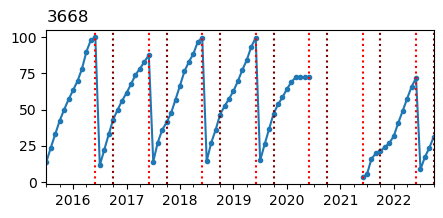

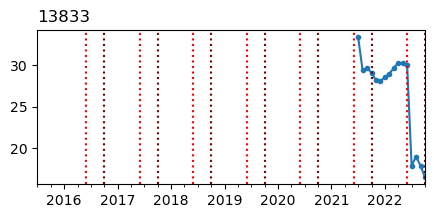

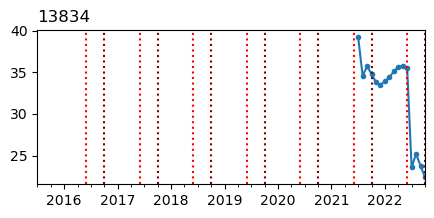

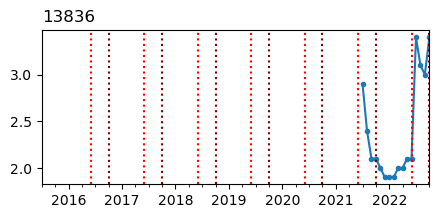

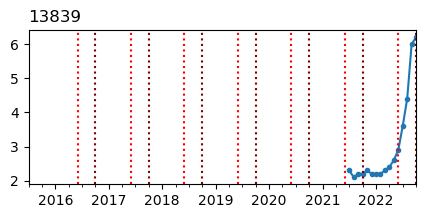

In [94]:
for i, row in (
    maybe_bad_indicators[
        (maybe_bad_indicators['Additive']) & 
        (maybe_bad_indicators['Measurement Type'] == 'Percentage')
    ].iterrows()):

    row_id = row['ID']

    ax = (
        indicators_full[
            indicators_full['ID'] == row_id
        ]
        .sort_values(by='Value Date', ascending=False)
        .set_index('Value Date')
        ['Accepted Value YTD']
        .plot(
            figsize=(5,2),
            kind='line',
            marker='.'
        )
    )

    for year in range(2016,2023):
        plt.axvline(f'{year}-10-01', 0, 1, ls=':', color='maroon')
        plt.axvline(f'{year}-06-01', 0, 1, ls=':', color='red')

    plt.title(row_id, loc='left')
    ax.set(xlabel=None)
    plt.show()

some of these _are_ additive, some are _not_. So can't rely in the `Measurement Type` value to filter which should be scaled. Need to manually review them and set `Additive = True` and default scale those that have been manually identified as additive.

[`get_scale_from_oct_to_full_year.py` has been updated to do this]

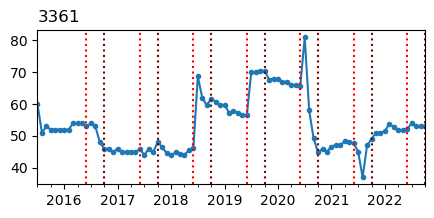

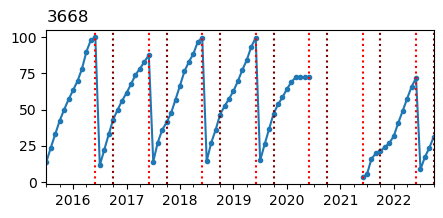

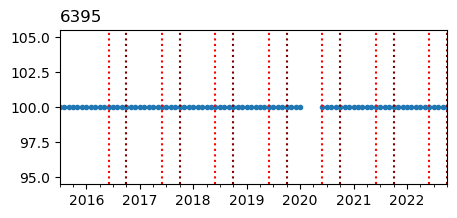

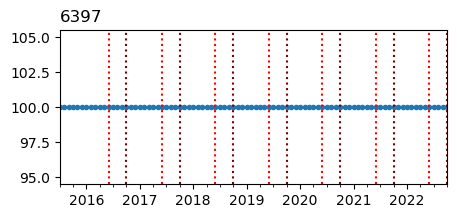

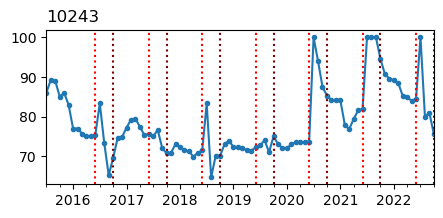

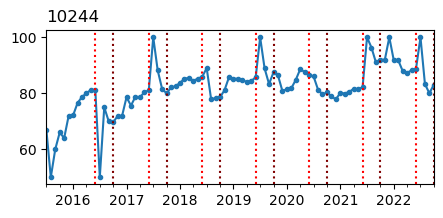

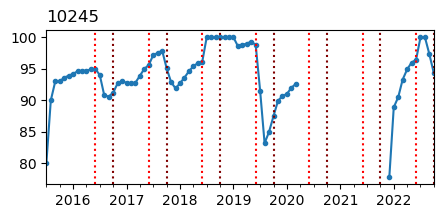

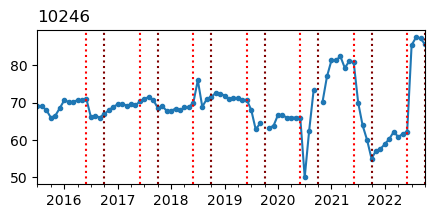

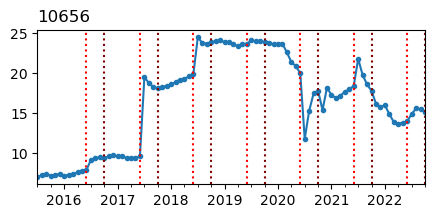

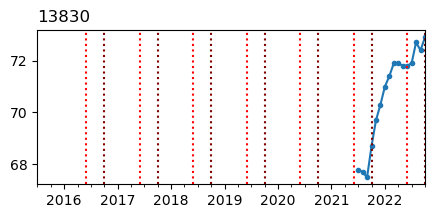

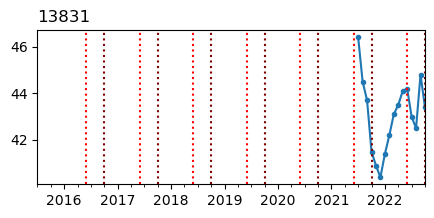

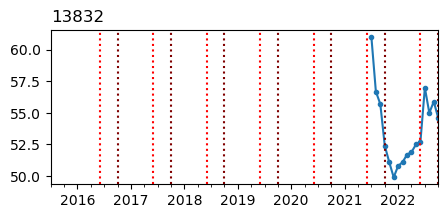

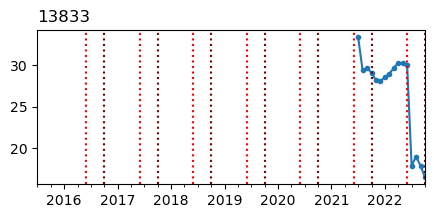

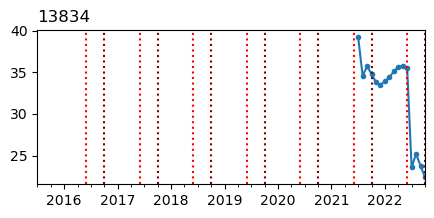

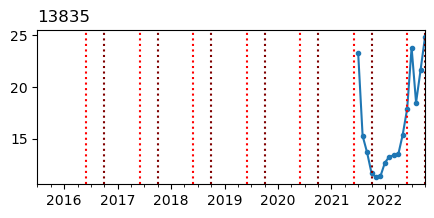

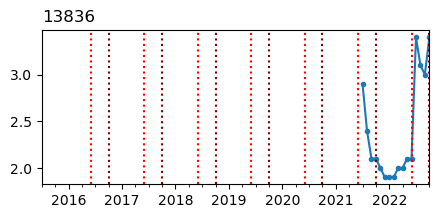

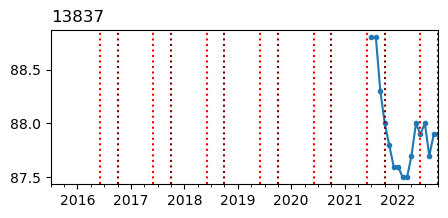

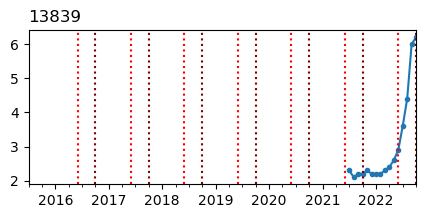

In [96]:
for i, row in (
    indicators[
        (indicators['Additive']) & 
        (indicators['Measurement Type'] == 'Percentage')
    ].iterrows()):

    row_id = row['ID']

    ax = (
        indicators_full[
            indicators_full['ID'] == row_id
        ]
        .sort_values(by='Value Date', ascending=False)
        .set_index('Value Date')
        ['Accepted Value YTD']
        .plot(
            figsize=(5,2),
            kind='line',
            marker='.'
        )
    )

    for year in range(2016,2023):
        plt.axvline(f'{year}-10-01', 0, 1, ls=':', color='maroon')
        plt.axvline(f'{year}-06-01', 0, 1, ls=':', color='red')

    plt.title(row_id, loc='left')
    ax.set(xlabel=None)
    plt.show()